# Final Project Submission

Please fill out:
* Student name: Sung Bae
* Student pace: full time
* Scheduled project review date/time: 9/17/2020 7:00 PM
* Instructor name: James Irving
* Blog post URL:


# Preparing Data

## Importing Various Libraries

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore') # Ignores big red warning signs
 
%matplotlib inline
sns.set_style("whitegrid")

In [43]:
# importing my own python file
%load_ext autoreload
%autoreload 2
from shb import MakeModel

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Importing data

In [44]:
# import 'kc_house_data.csv'
df = pd.read_csv('kc_house_data.csv')
len(df.columns)

21

In [45]:
(df['id'].value_counts()>1).sum()
print(df.lat.shape, df.long.shape, df.price.shape)
print(df.lat.isna().sum(), df.long.isna().sum(), df.price.isna().sum())
df.info()

(21597,) (21597,) (21597,)
0 0 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
m

<AxesSubplot:xlabel='long', ylabel='lat'>

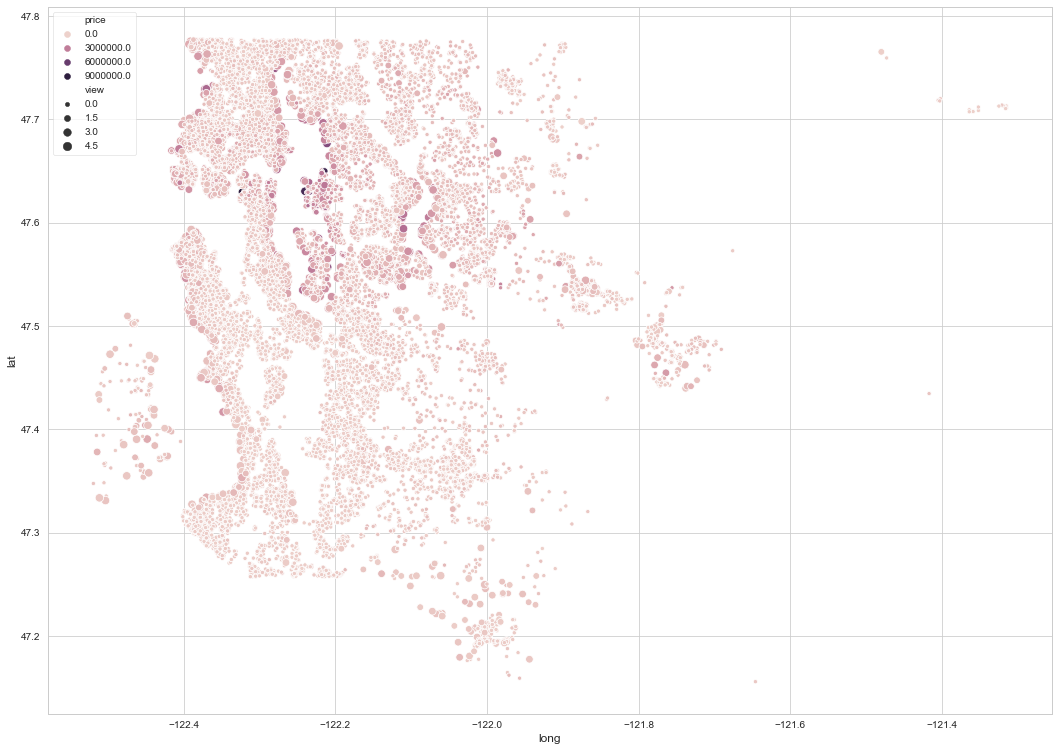

In [46]:
fig, ax = plt.subplots(figsize=(18,13))
sns.scatterplot(x='long', y='lat', size='view', hue='price', data=df)

In [47]:
# Uncomment and execute the following lines of the codes to skip determining cat/cont columns:
# predetermed categorical colums:
cat_cols = ['id', 'bedrooms','bathrooms','floors','waterfront','view','condition','grade','yr_renovated','zipcode']
# predetermed continuous colums:
cont_cols = ['price','sqft_living','sqft_lot','sqft_above','yr_built','lat','long','sqft_living15','sqft_lot15']

In [295]:
# # Determining categorical and continous columns by examining histograms
# cat_cols = []
# cont_cols = []
# for col in df.columns:
#     fig, ax = plt.subplots(figsize=(10,7))
#     try:
#         sns.distplot(df[col], bins='auto', ax=ax)
#         ax.set(title=f'{col}', xlabel=f'{col}', ylabel='frequency')
#         plt.show()
#         user_input = input('Category(0) or continuous(1): ')
#         if user_input=='1':
#             cont_cols.append(col)
#         elif user_input=='0':
#             cat_cols.append(col)
#     except:
#         print(col)

## Preprocessing continuous columns

In [48]:
# checking for any missing values
df[cont_cols].isna().sum()

price            0
sqft_living      0
sqft_lot         0
sqft_above       0
yr_built         0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

> Notice that there aren't any missing values! Yay!

In [49]:
model1 = MakeModel(df, cat_cols=cat_cols, cont_cols=cont_cols)


                    Options:
                    	1. Correlation Matrix
                    	2. Variance Inflation Factor (VIF)
                  
Choose which method you would like to determine multicolinearity variables: 1


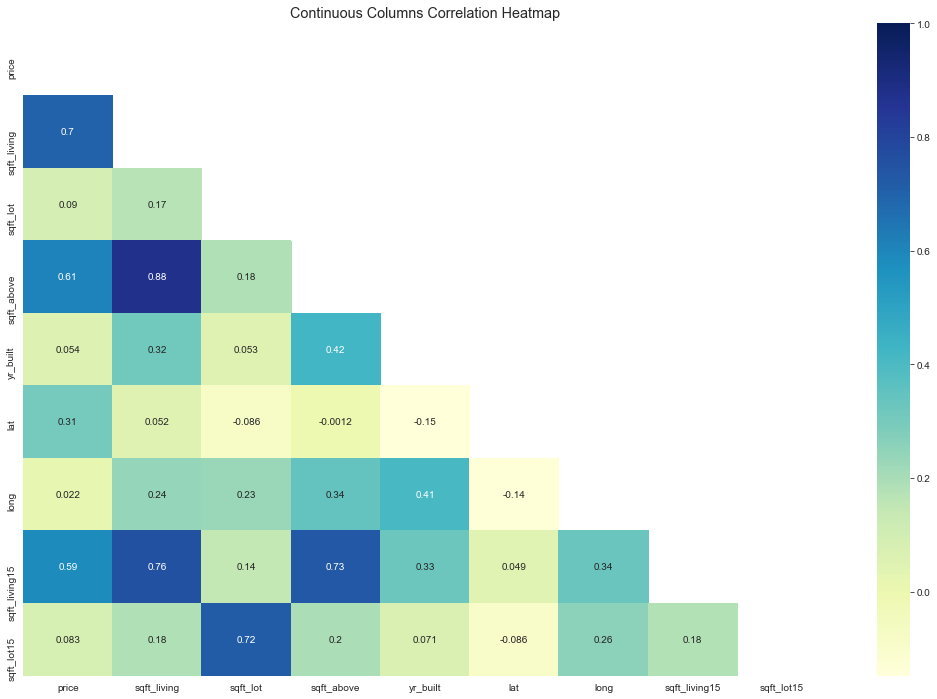

sqft_living  sqft_above       0.876448
             sqft_living15    0.756402
sqft_above   sqft_living15    0.731767
sqft_lot     sqft_lot15       0.718204
price        sqft_living      0.701917
             sqft_above       0.605368
             sqft_living15    0.585241
sqft_above   yr_built         0.424037
yr_built     long             0.409993
sqft_above   long             0.344842
dtype: float64
Write column name you would like to get rid of (Enter "x" to exit): sqft_above
'sqft_above' has been DELETED!
There are now 20 columns in the data.


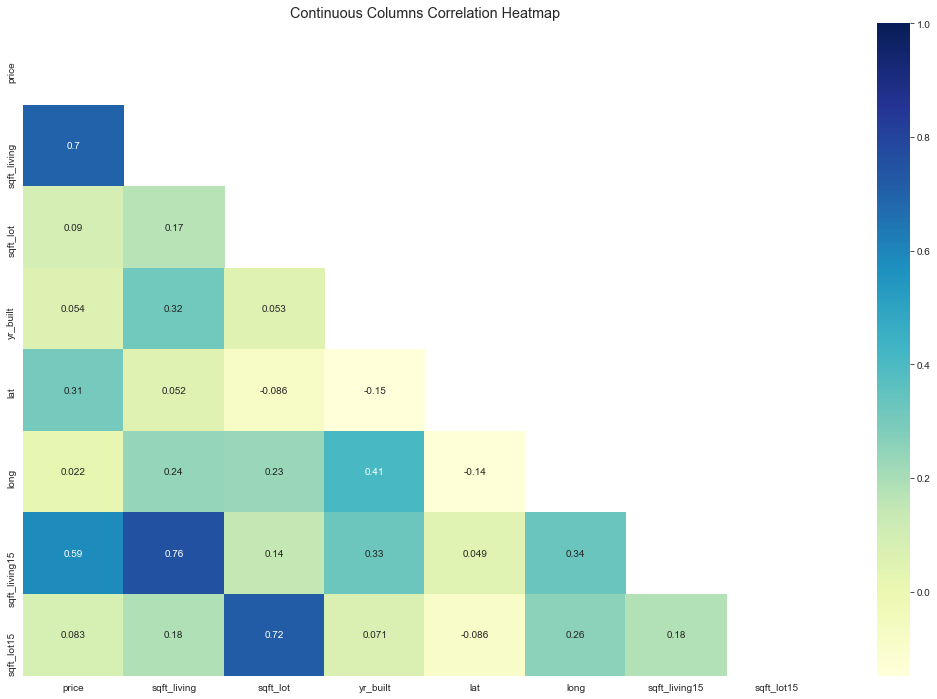

sqft_living  sqft_living15    0.756402
sqft_lot     sqft_lot15       0.718204
price        sqft_living      0.701917
             sqft_living15    0.585241
yr_built     long             0.409993
long         sqft_living15    0.335626
yr_built     sqft_living15    0.326377
sqft_living  yr_built         0.318152
price        lat              0.306692
long         sqft_lot15       0.255586
dtype: float64
Write column name you would like to get rid of (Enter "x" to exit): sqft_living15
'sqft_living15' has been DELETED!
There are now 19 columns in the data.


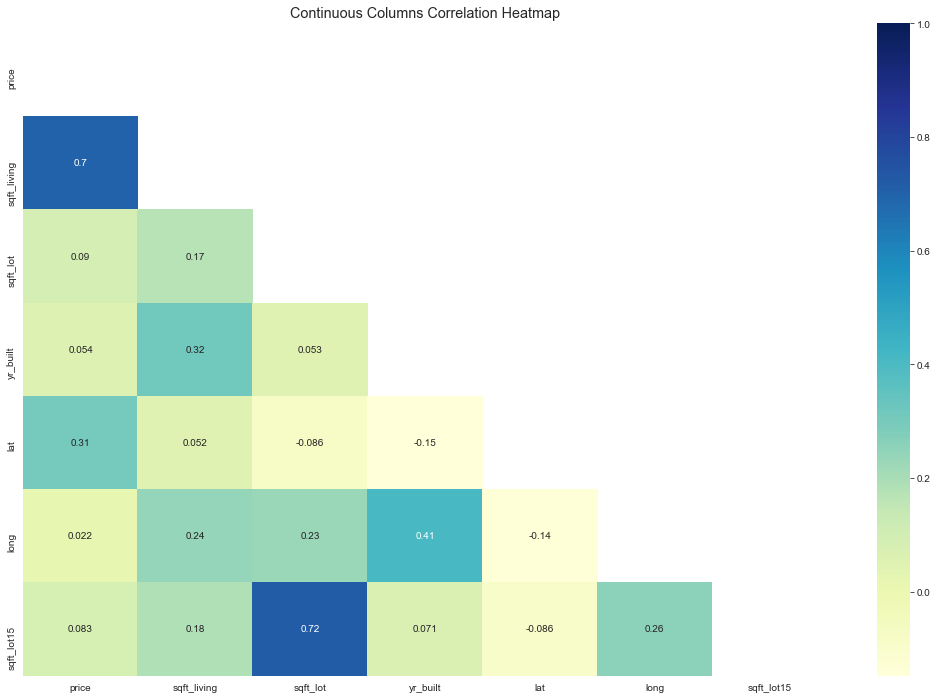

sqft_lot     sqft_lot15     0.718204
price        sqft_living    0.701917
yr_built     long           0.409993
sqft_living  yr_built       0.318152
price        lat            0.306692
long         sqft_lot15     0.255586
sqft_living  long           0.241214
sqft_lot     long           0.230227
sqft_living  sqft_lot15     0.184342
             sqft_lot       0.173453
dtype: float64
Write column name you would like to get rid of (Enter "x" to exit): sqft_lot15
'sqft_lot15' has been DELETED!
There are now 18 columns in the data.


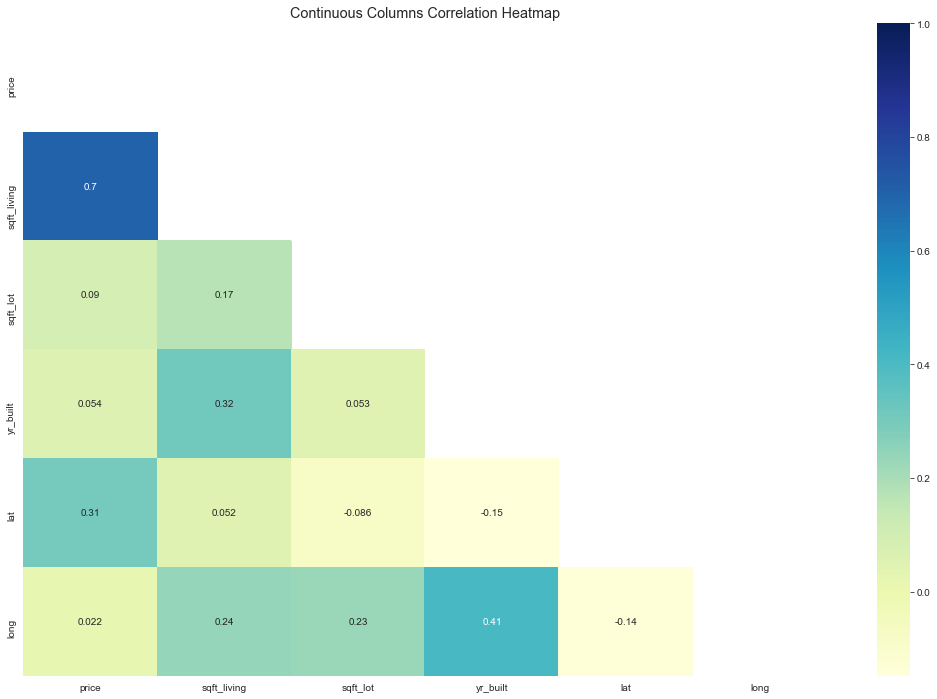

price        sqft_living    0.701917
yr_built     long           0.409993
sqft_living  yr_built       0.318152
price        lat            0.306692
sqft_living  long           0.241214
sqft_lot     long           0.230227
sqft_living  sqft_lot       0.173453
yr_built     lat            0.148370
lat          long           0.135371
price        sqft_lot       0.089876
dtype: float64
Write column name you would like to get rid of (Enter "x" to exit): x
Exiting!
There are 18 columns remaining in the data


In [50]:
model1.multicolinearity(option='cont')

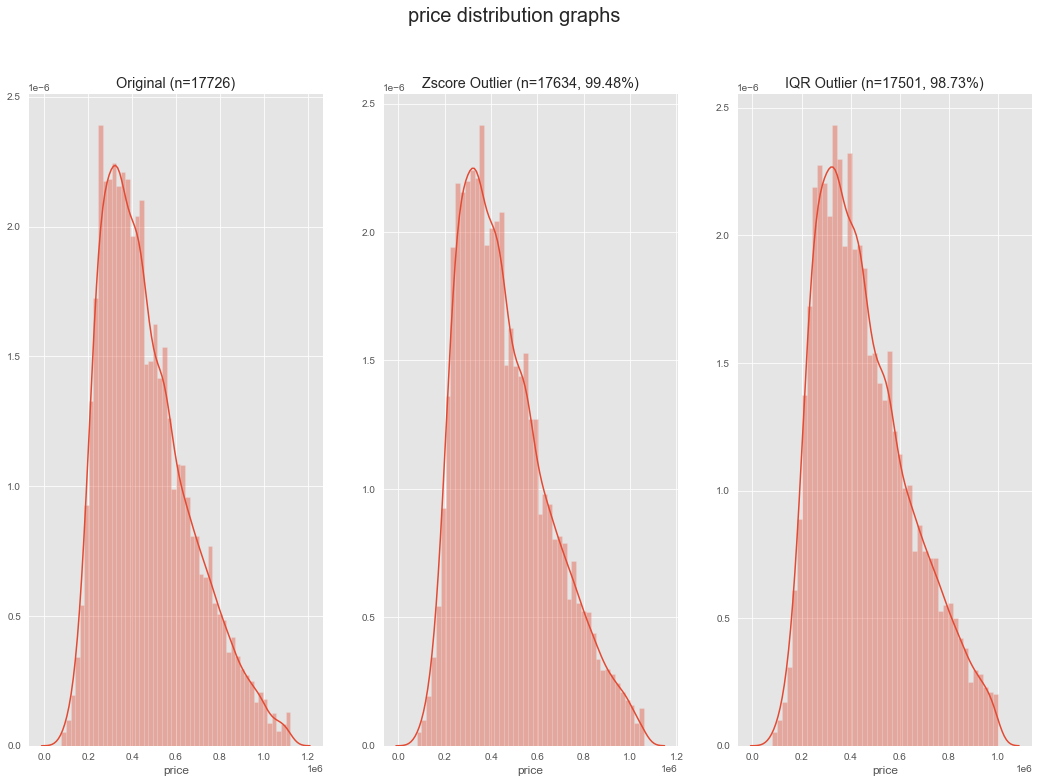

Choose an option (1) none (2) zscore method (3) IQR method (4) Drop column: 1
nothing has changed.


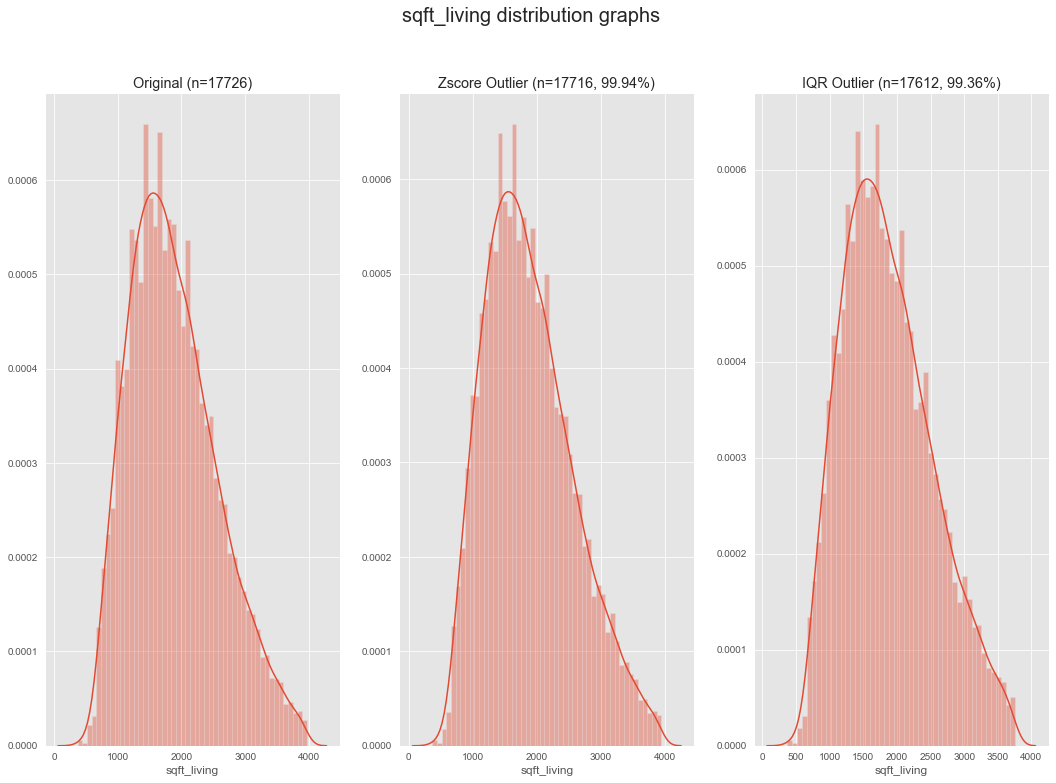

Choose an option (1) none (2) zscore method (3) IQR method (4) Drop column: 1
nothing has changed.


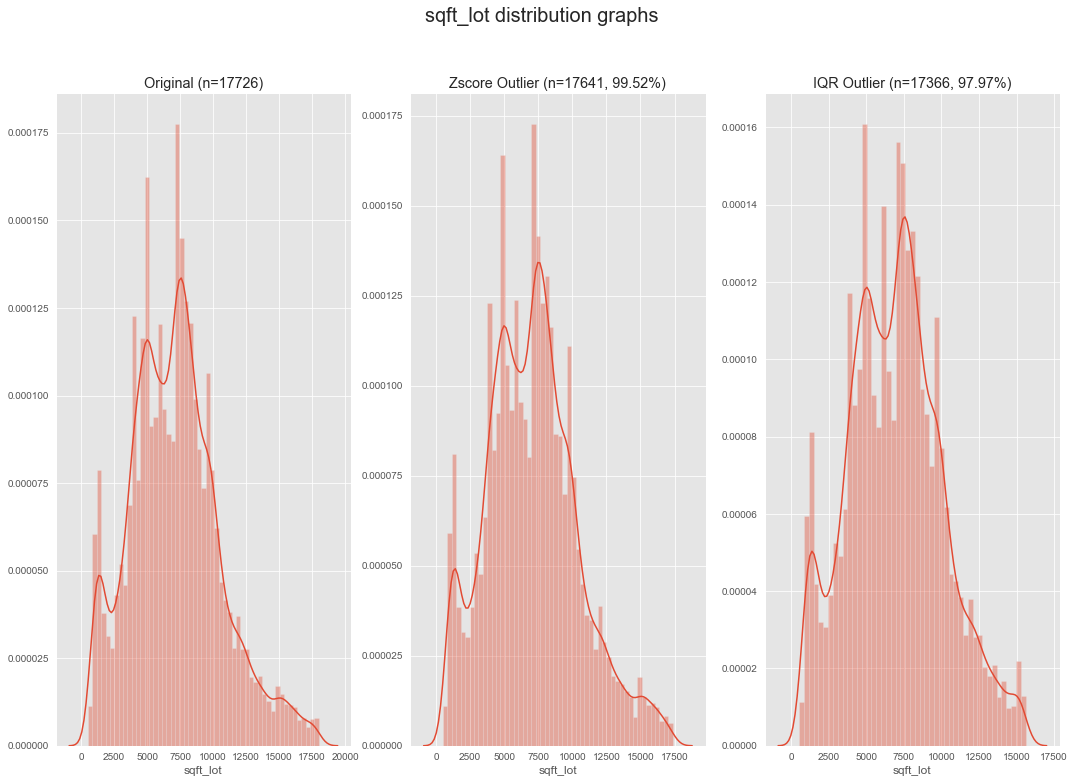

Choose an option (1) none (2) zscore method (3) IQR method (4) Drop column: 1
nothing has changed.


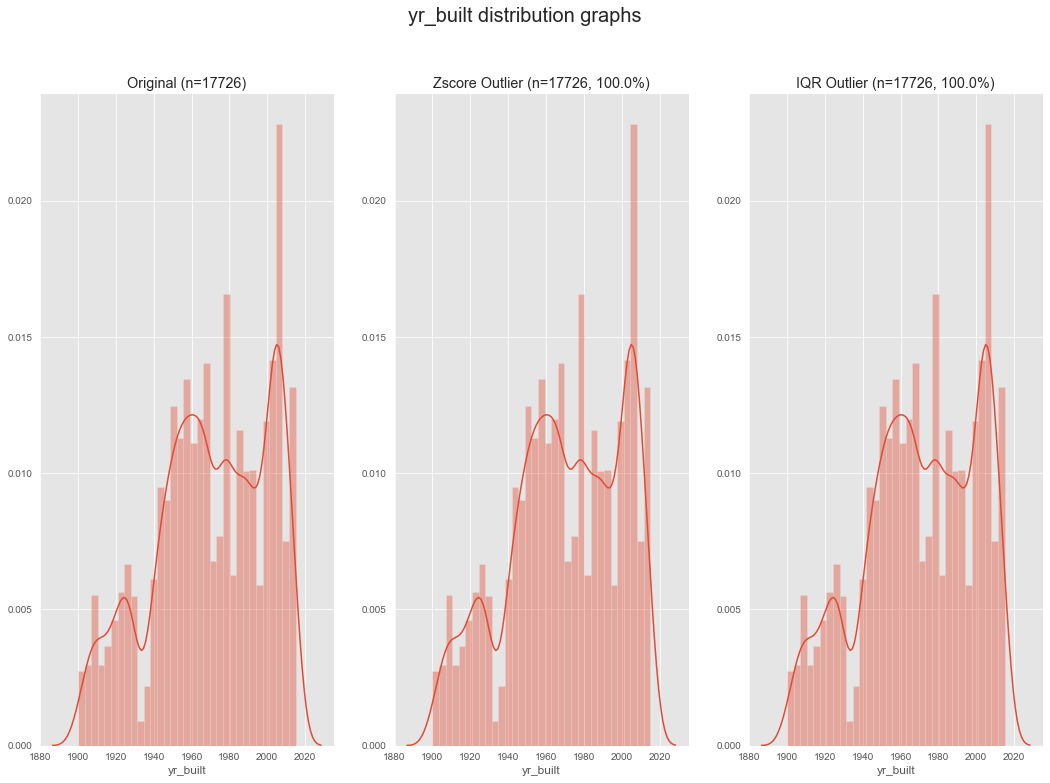

Choose an option (1) none (2) zscore method (3) IQR method (4) Drop column: 1
nothing has changed.


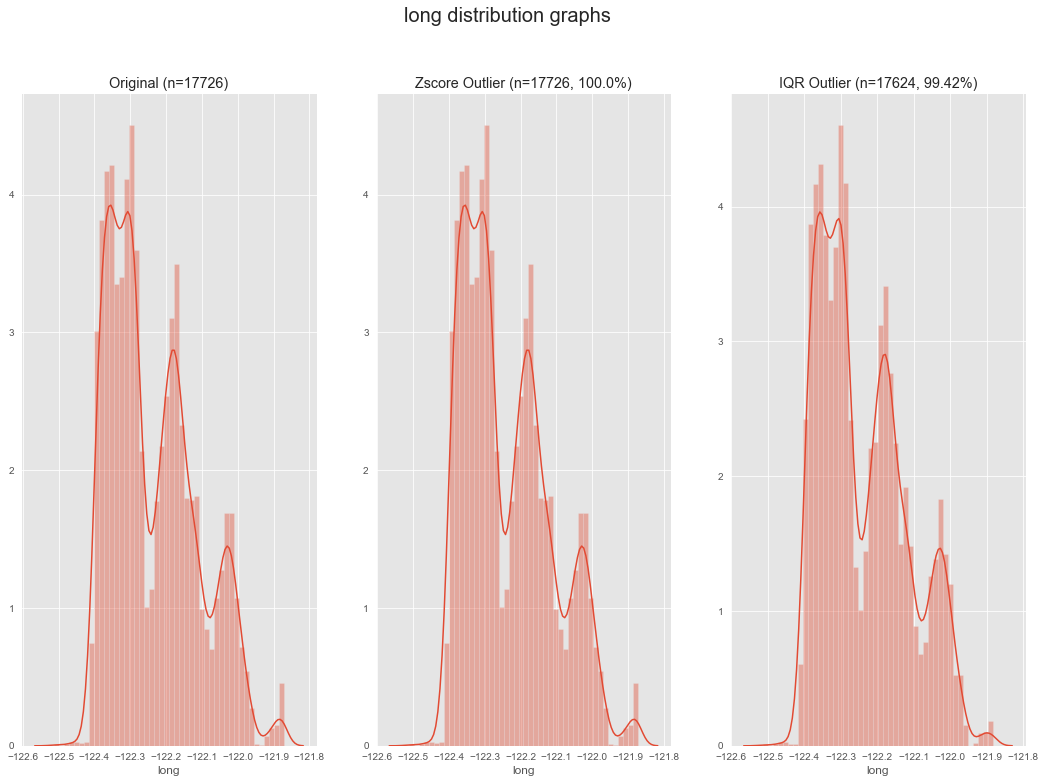

Choose an option (1) none (2) zscore method (3) IQR method (4) Drop column: 4
'long' has been DELETED!
There are now 16 columns in the data.


In [53]:
cols = model1.cont_cols
for col in cols:
    model1.outlier(col)

In [23]:
model1.cont_cols

['price', 'sqft_living', 'sqft_lot', 'yr_built', 'long']

> Based on this correlation map, we can conclude that
    - All sqft related variables are closely related.
> We will take sqft_living 

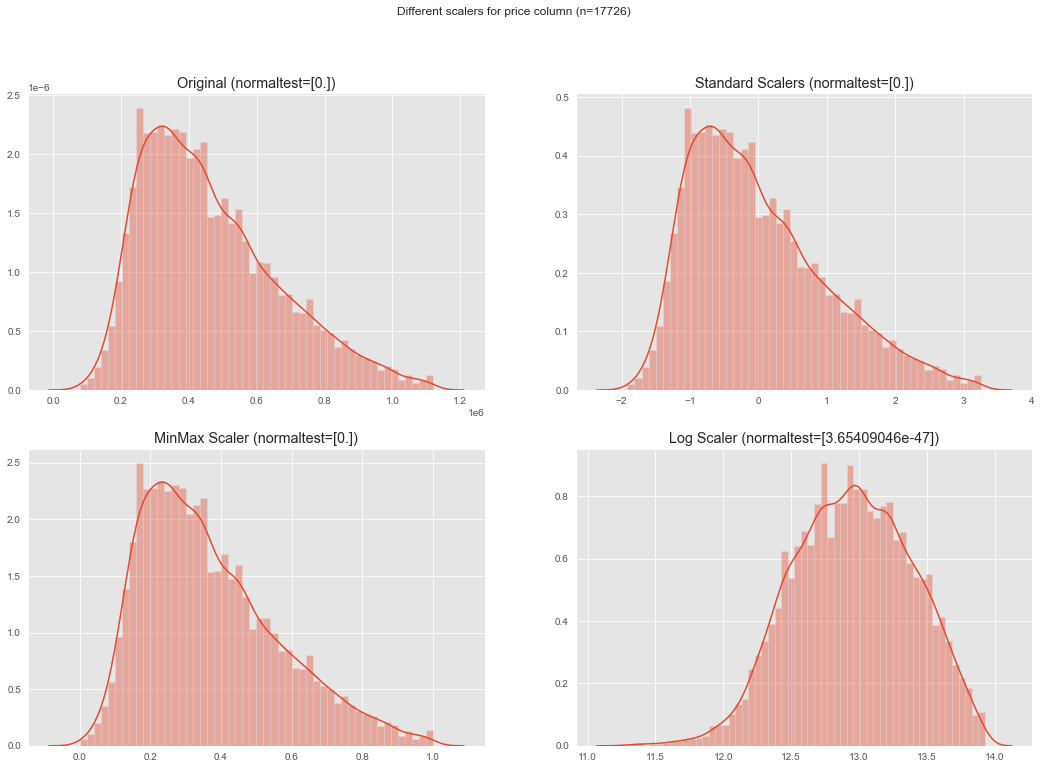

Choose an option (1) none (2) standard (3) min_max (4) logarithmic: 4


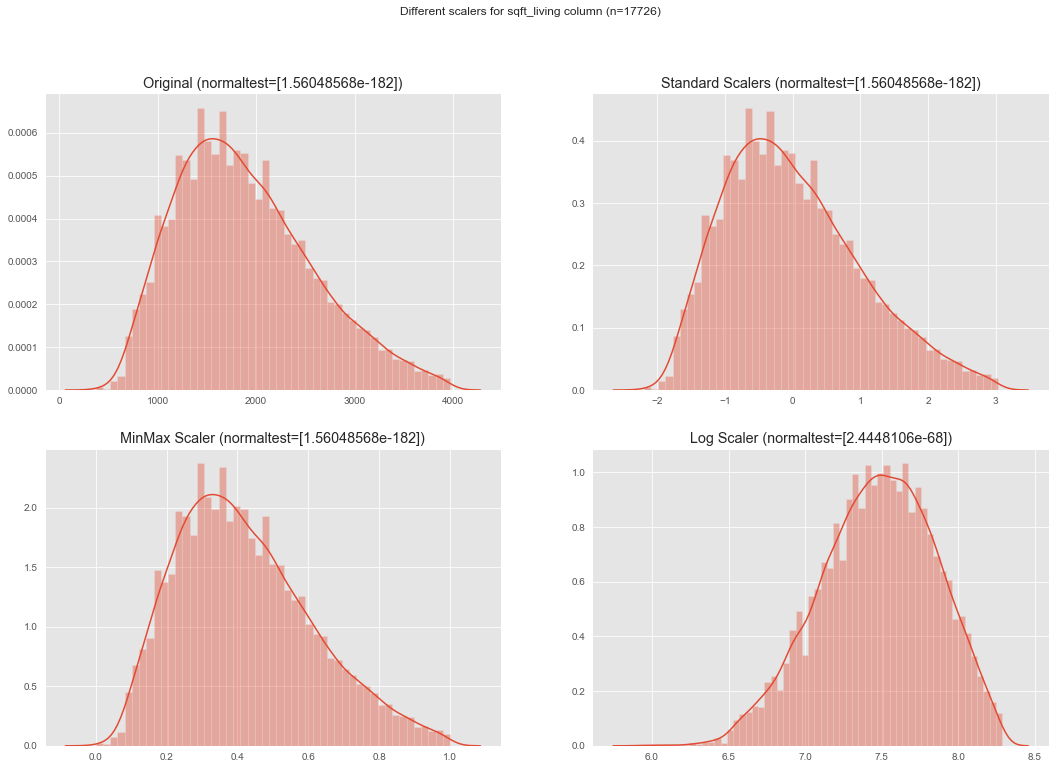

Choose an option (1) none (2) standard (3) min_max (4) logarithmic: 4


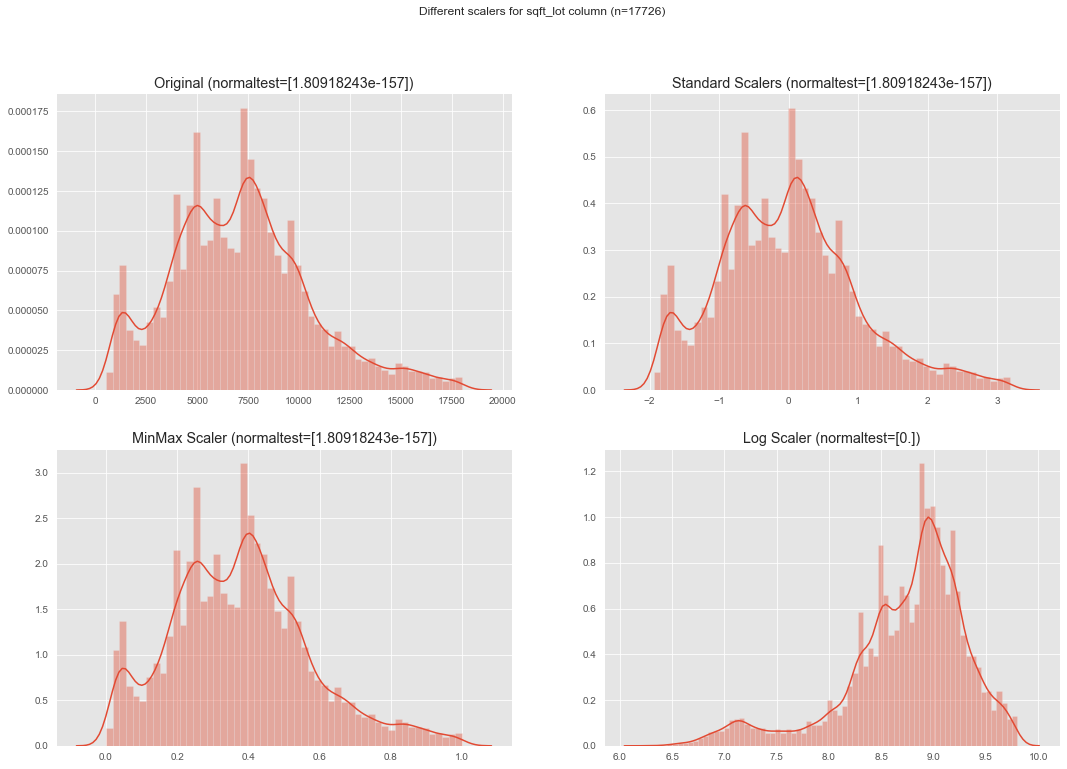

Choose an option (1) none (2) standard (3) min_max (4) logarithmic: 4


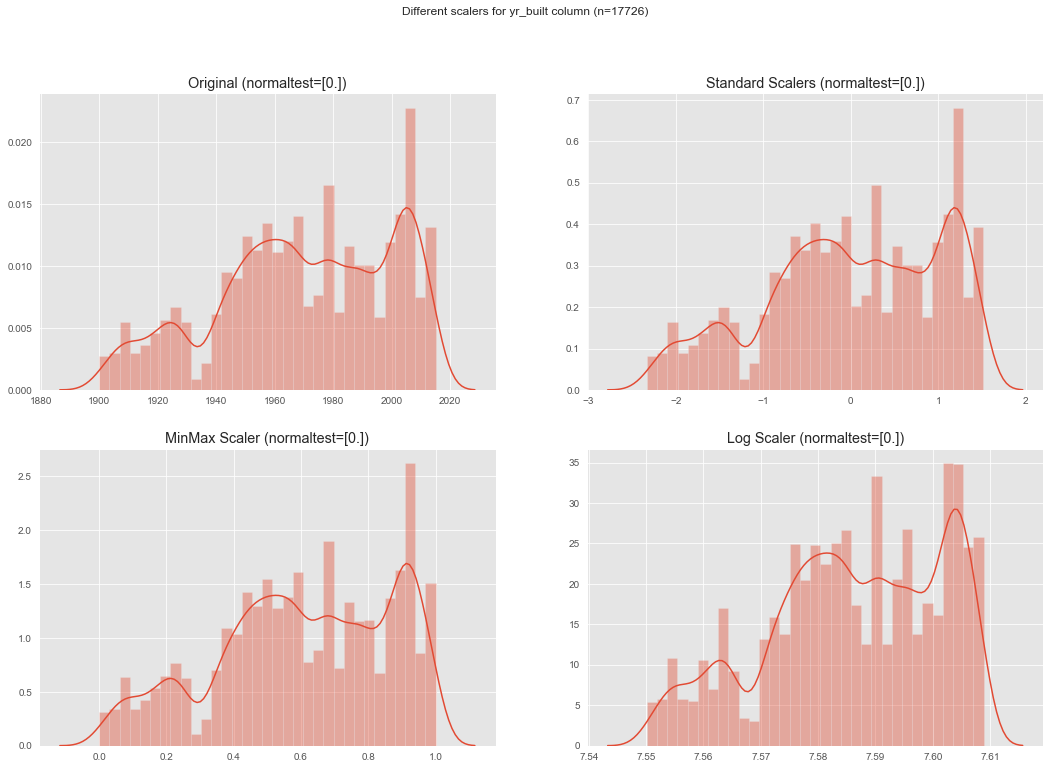

Choose an option (1) none (2) standard (3) min_max (4) logarithmic: 1
Nothing has changed.


In [54]:
cols = model1.cont_cols
for col in cols:
    model1.scaler(col)

In [64]:
model1.X = model1.data[model1.cont_cols].drop(columns='price')
model1.y = model1.data[model1.target]

In [65]:
model1.split()

Shape of X_train: (13294, 3)
Shape of X_test: (4432, 3)
Shape of y_train: (13294,)
Shape of y_test: (4432,)


In [66]:
features = ' + '.join(model1.X_train.columns)
features

'sqft_living + sqft_lot + yr_built'

In [67]:
formula = 'price ~ '+features
formula

'price ~ sqft_living + sqft_lot + yr_built'

In [74]:
formula = model1.get_formula()
formula

'price ~ sqft_living + sqft_lot + yr_built'

In [75]:
model = model1.regression(formula)

In [76]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.407
Method:                 Least Squares   F-statistic:                     3040.
Date:                Wed, 16 Sep 2020   Prob (F-statistic):               0.00
Time:                        23:47:03   Log-Likelihood:                -4486.9
No. Observations:               13294   AIC:                             8982.
Df Residuals:                   13290   BIC:                             9012.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      15.8437      0.208     76.108      0.000      15.436      16.252
sqft_living     0.8291      0.009     95.124      0.000       0.812       0.846
sqft_lot       -0.1898      0.005    -36.555      0.000      -0.200      -0.180
yr_built       -0.0038      0.000    -35.035      0.000      -0.004      -0.004
==============================================================================
Omnibus:                      102.013   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               97.071
Skew:                          -0.181   Prob(JB):                     8.34e-22
Kurtosis:                       2.789   Cond. No.                     1.39e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Train MSE = 0.11499720229206366	Train R2 = 0.40697296003816763
Test MSE = 0.1129393451294835	Test R2 = 0.4184830674145358


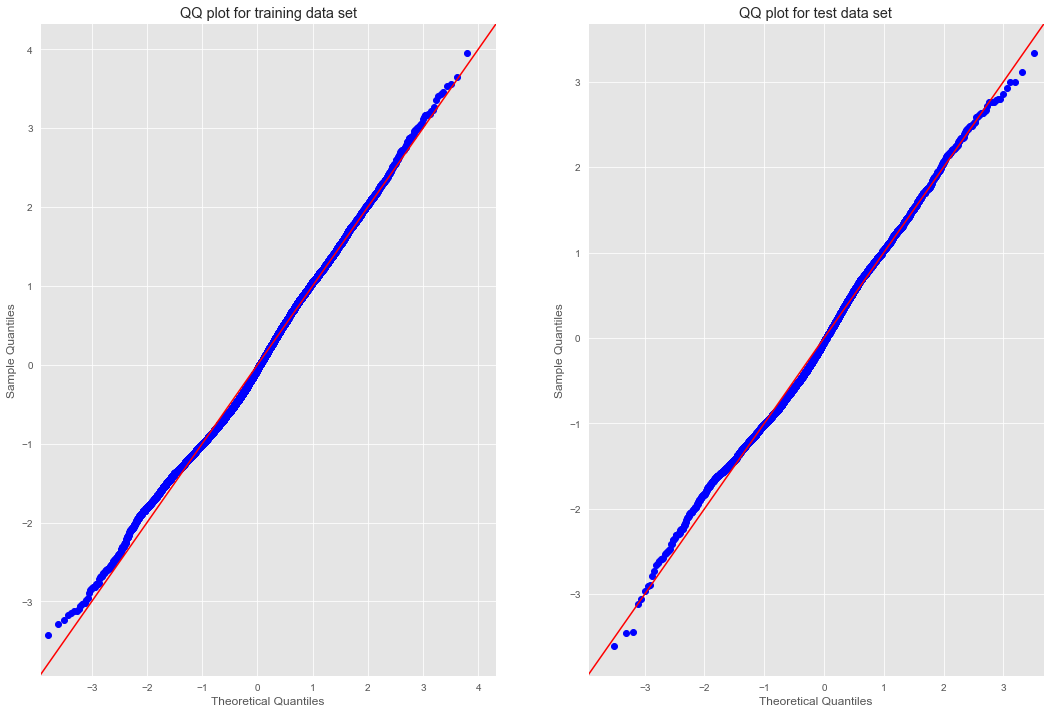

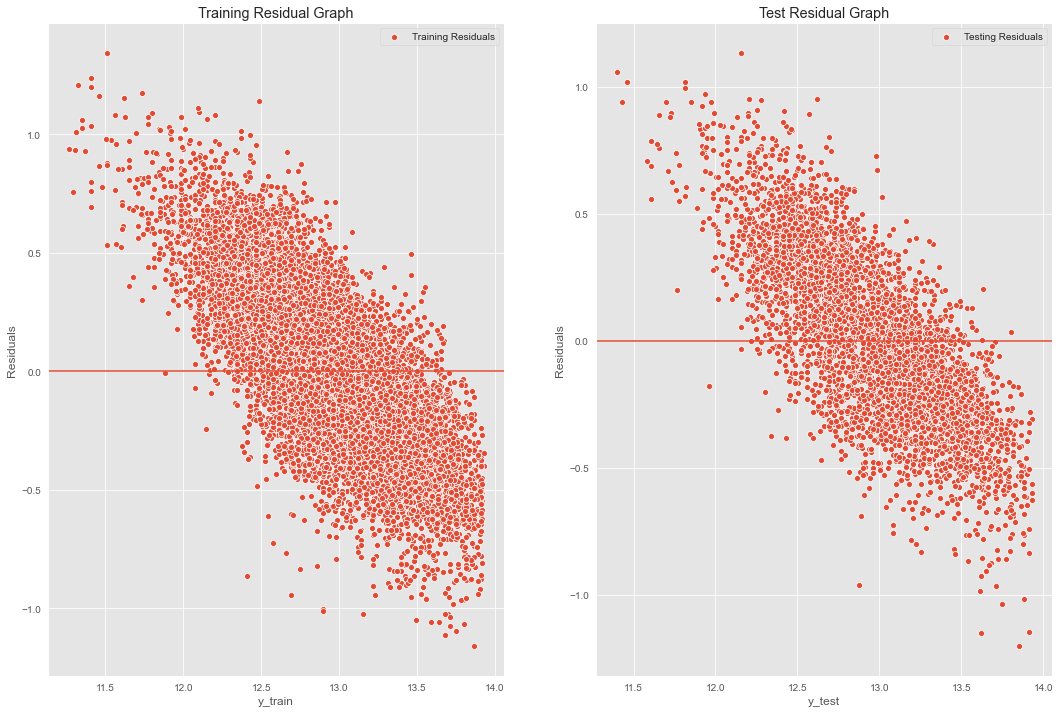

In [83]:
model1.validate_model()

# Model #2

In [273]:
# import 'kc_house_data.csv'
df = pd.read_csv('kc_house_data.csv')
# len(df.columns)

# Uncomment and execute the following lines of the codes to skip determining cat/cont columns:
# # predetermed categorical colums:
# cat_cols = ['id', 'bedrooms','bathrooms','floors','waterfront','view','condition','grade','yr_renovated','zipcode']
# # predetermed continuous colums:
# cont_cols = ['price','sqft_living','sqft_lot','sqft_above','yr_built','lat','long','sqft_living15','sqft_lot15']

In [274]:
model2 = MakeModel(df)

In [275]:
model2.count_na()

yr_renovated     3842
waterfront       2376
view               63
sqft_lot15          0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
condition           0
sqft_living15       0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
zipcode             0
lat                 0
long                0
id                  0
dtype: int64


> Changes:
    - waterfront: fillna with 0.
    - yr_renovated: boolean where 1 means renovated and 0 means not renovated. fill na's with 0s.
    - yr_built: make a new column called age = current year - yr_built
    - view: fillna with mode (0.0)

In [276]:
# waterfront: fillnas with 0s. view:fillnas with mode
model2.imuter('waterfront', option=0)
model2.imuter('view', option='mode')


Number of nulls:  0
None
Number of nulls:  0
None


In [277]:
model2.count_na()

yr_renovated     3842
sqft_lot15          0
view                0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
condition           0
sqft_living15       0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
zipcode             0
lat                 0
long                0
id                  0
dtype: int64


In [278]:
# yr_renovated into booleans
model2.data['yr_renovated'] = model2.data['yr_renovated']>1000

In [279]:
# Create a new column 'age' and drop 'yr_built'
model2.data['age'] = 2019 - model2.data['yr_built']
model2.data.drop(columns='yr_built', axis=1, inplace=True)

In [280]:
model2.data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'age'],
      dtype='object')

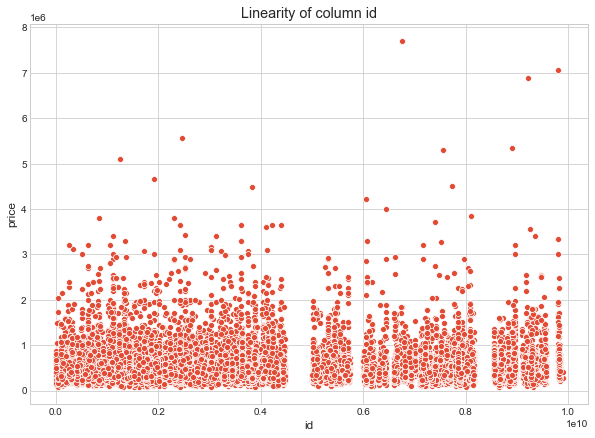


                      Options
                      1. Categorical column
                      2. Continuous column
                      3. Drop column
                      
Classify the column: 3
'id' has been DELETED!
There are now 20 columns in the data.


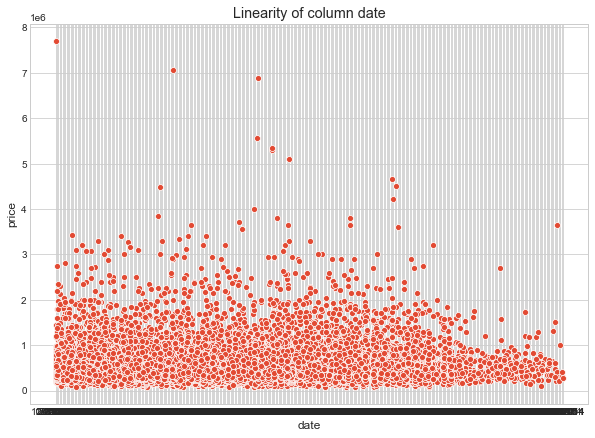


                      Options
                      1. Categorical column
                      2. Continuous column
                      3. Drop column
                      
Classify the column: 3
'date' has been DELETED!
There are now 19 columns in the data.


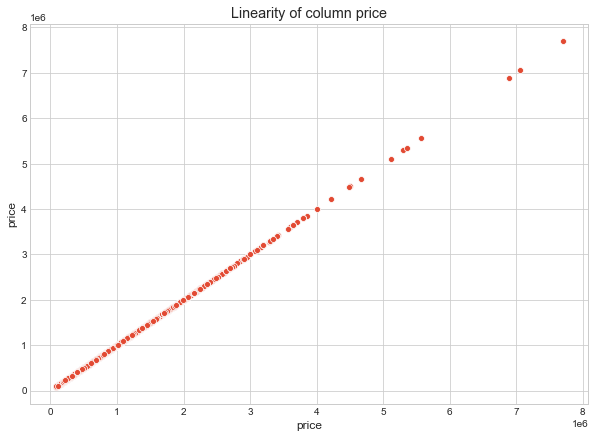


                      Options
                      1. Categorical column
                      2. Continuous column
                      3. Drop column
                      
Classify the column: 2
'price' has been added to continuous columns!'


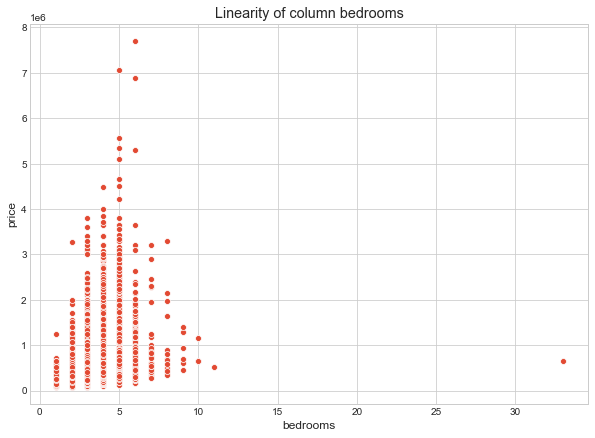


                      Options
                      1. Categorical column
                      2. Continuous column
                      3. Drop column
                      
Classify the column: 1
'bedrooms' has been added to categorical columns!'


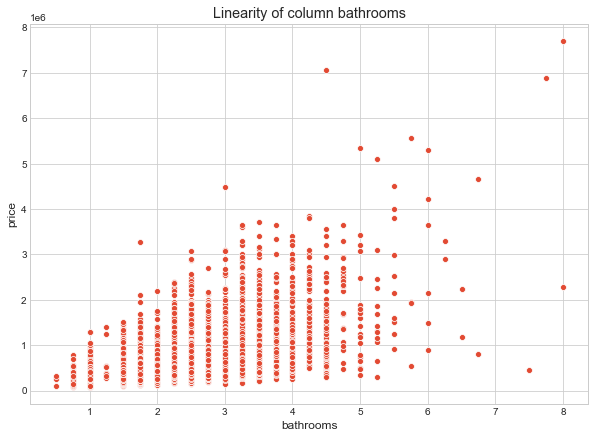


                      Options
                      1. Categorical column
                      2. Continuous column
                      3. Drop column
                      
Classify the column: 1
'bathrooms' has been added to categorical columns!'


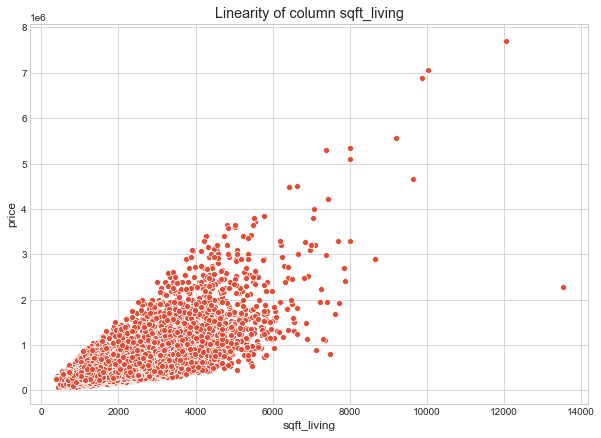


                      Options
                      1. Categorical column
                      2. Continuous column
                      3. Drop column
                      
Classify the column: 2
'sqft_living' has been added to continuous columns!'


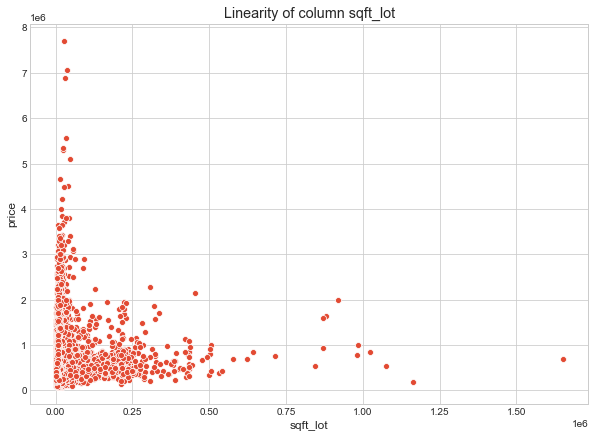


                      Options
                      1. Categorical column
                      2. Continuous column
                      3. Drop column
                      
Classify the column: 2
'sqft_lot' has been added to continuous columns!'


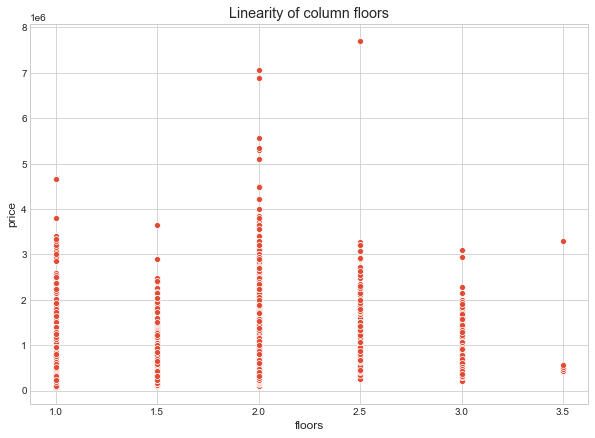


                      Options
                      1. Categorical column
                      2. Continuous column
                      3. Drop column
                      
Classify the column: 1
'floors' has been added to categorical columns!'


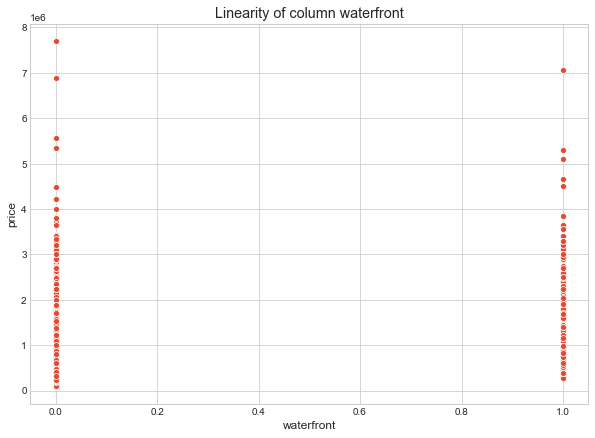


                      Options
                      1. Categorical column
                      2. Continuous column
                      3. Drop column
                      
Classify the column: 1
'waterfront' has been added to categorical columns!'


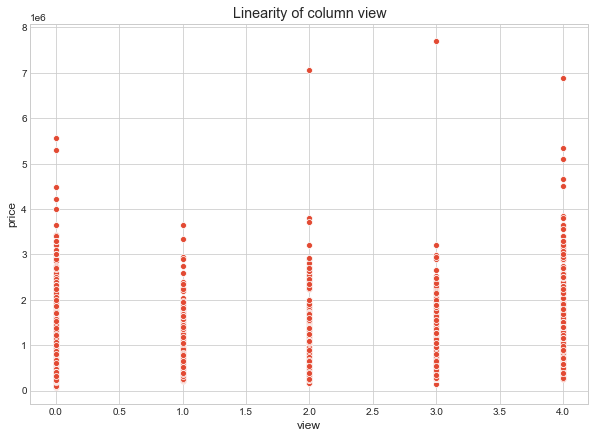


                      Options
                      1. Categorical column
                      2. Continuous column
                      3. Drop column
                      
Classify the column: 1
'view' has been added to categorical columns!'


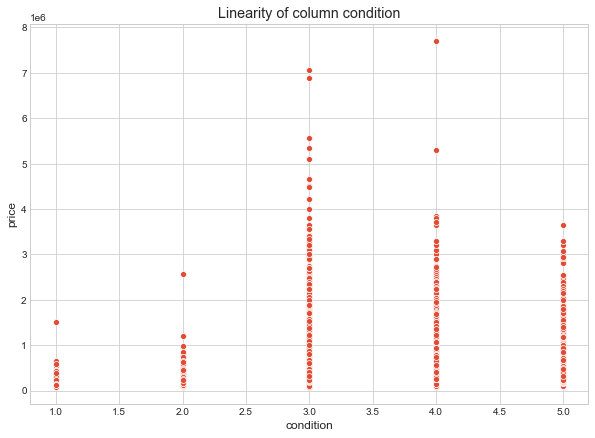


                      Options
                      1. Categorical column
                      2. Continuous column
                      3. Drop column
                      
Classify the column: 1
'condition' has been added to categorical columns!'


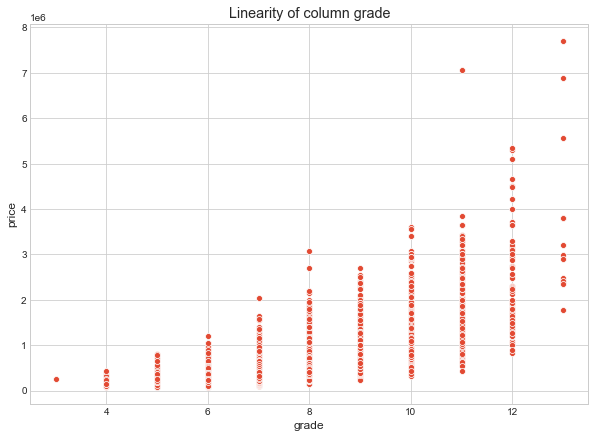


                      Options
                      1. Categorical column
                      2. Continuous column
                      3. Drop column
                      
Classify the column: 1
'grade' has been added to categorical columns!'


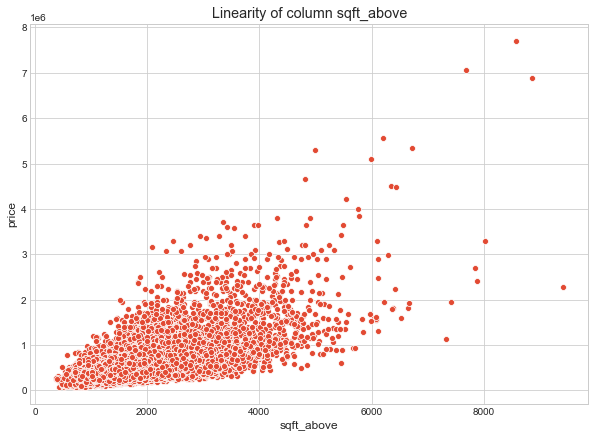


                      Options
                      1. Categorical column
                      2. Continuous column
                      3. Drop column
                      
Classify the column: 2
'sqft_above' has been added to continuous columns!'


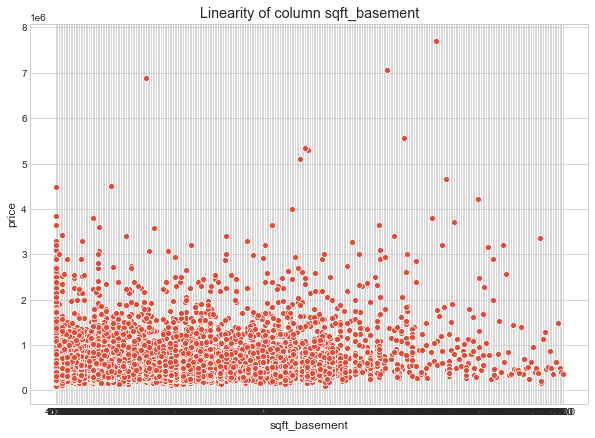


                      Options
                      1. Categorical column
                      2. Continuous column
                      3. Drop column
                      
Classify the column: 3
'sqft_basement' has been DELETED!
There are now 18 columns in the data.


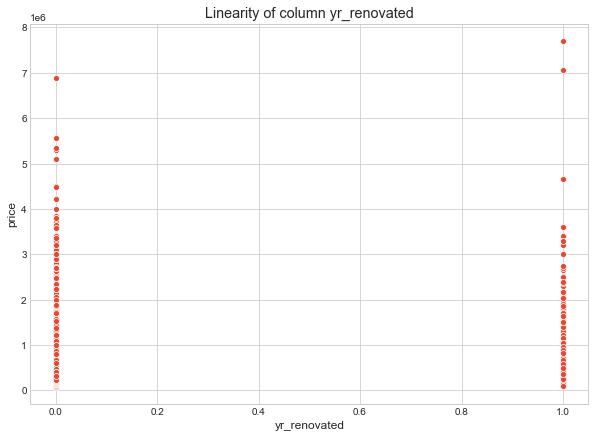


                      Options
                      1. Categorical column
                      2. Continuous column
                      3. Drop column
                      
Classify the column: 1
'yr_renovated' has been added to categorical columns!'


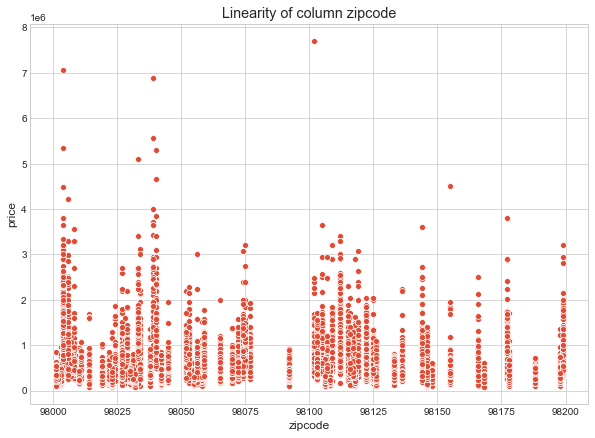


                      Options
                      1. Categorical column
                      2. Continuous column
                      3. Drop column
                      
Classify the column: 1
'zipcode' has been added to categorical columns!'


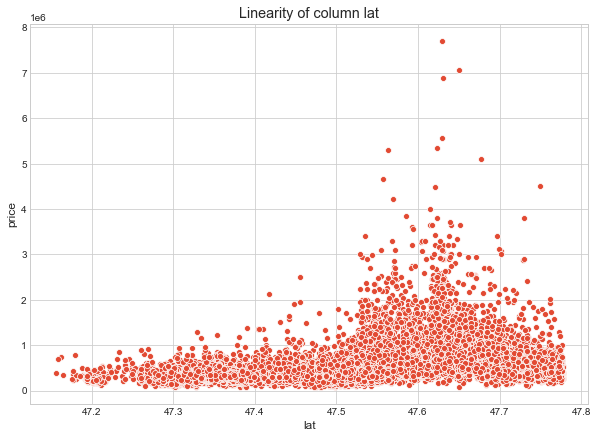


                      Options
                      1. Categorical column
                      2. Continuous column
                      3. Drop column
                      
Classify the column: 2
'lat' has been added to continuous columns!'


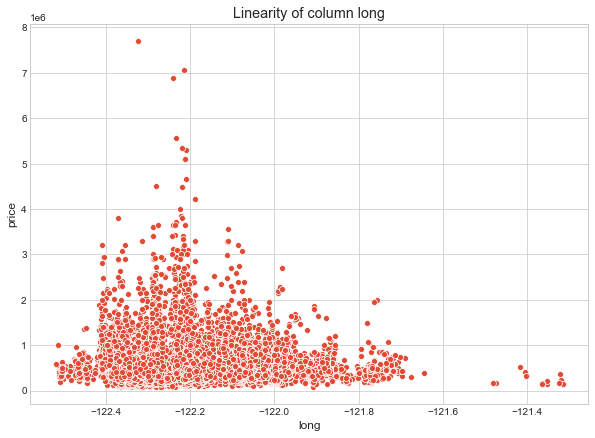


                      Options
                      1. Categorical column
                      2. Continuous column
                      3. Drop column
                      
Classify the column: 2
'long' has been added to continuous columns!'


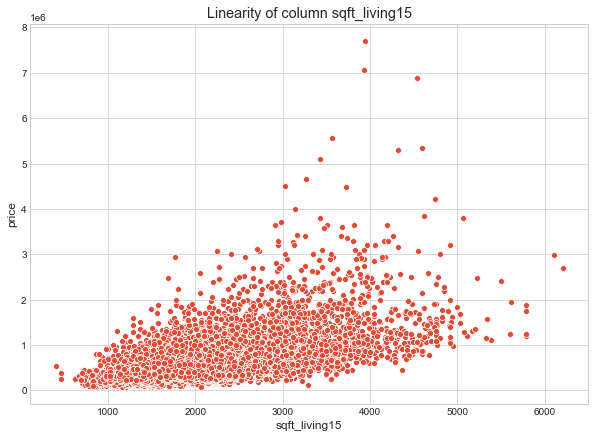


                      Options
                      1. Categorical column
                      2. Continuous column
                      3. Drop column
                      
Classify the column: 2
'sqft_living15' has been added to continuous columns!'


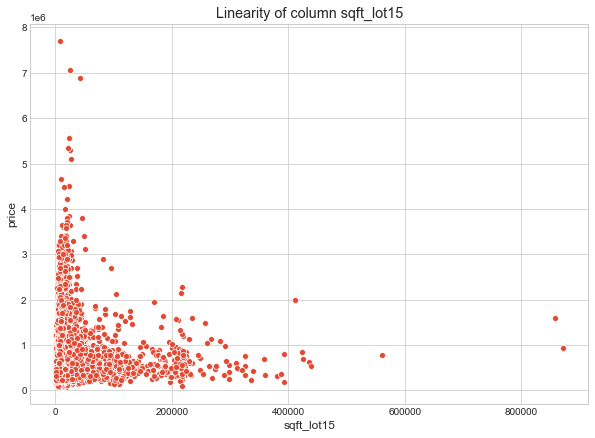


                      Options
                      1. Categorical column
                      2. Continuous column
                      3. Drop column
                      
Classify the column: 2
'sqft_lot15' has been added to continuous columns!'


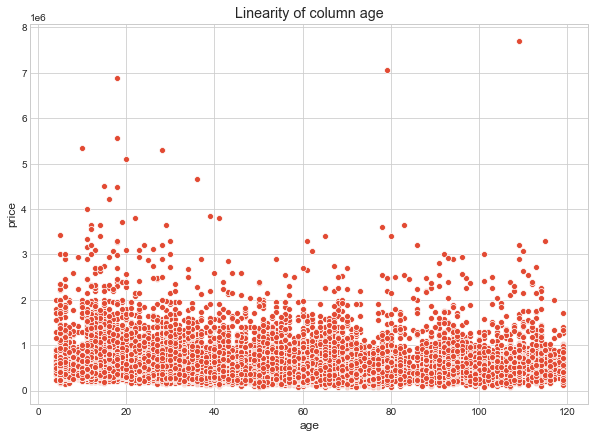


                      Options
                      1. Categorical column
                      2. Continuous column
                      3. Drop column
                      
Classify the column: 2
'age' has been added to continuous columns!'


In [281]:
# Categorize each col into either categorical, continous or just drop
# Also check for linearity between each variable vs. price (target)
model2.col_classifier()

In [290]:
model2.cat_cols=['bedrooms',
 'floors',
 'waterfront',
 'view',
 'condition',
 'yr_renovated',
 'zipcode']

model2.cont_cols = ['price',
 'sqft_lot',
 'sqft_living',
 'age',
 'lat',
 'long']


                    Options:
                    	1. Correlation Matrix
                    	2. Variance Inflation Factor (VIF)
                  
Choose which method you would like to determine multicolinearity variables: 1


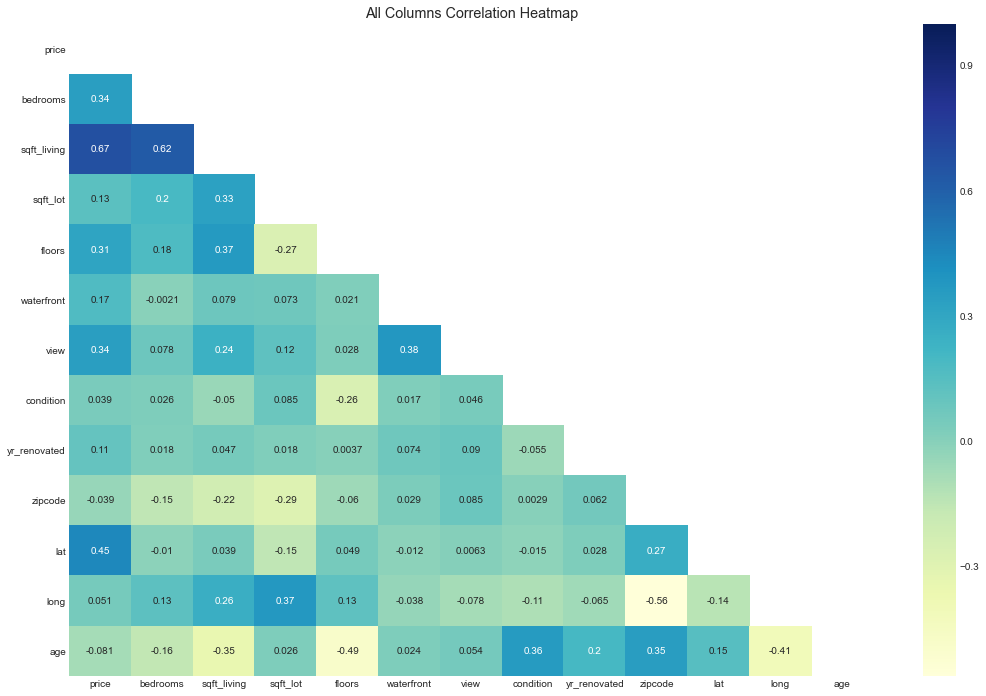

price        sqft_living    0.674829
bedrooms     sqft_living    0.621811
zipcode      long           0.564259
floors       age            0.489193
price        lat            0.448837
long         age            0.409993
waterfront   view           0.380543
sqft_lot     long           0.373922
sqft_living  floors         0.367566
condition    age            0.361592
dtype: float64


Write column name you would like to get rid of (Enter "x" to exit): bedrooms
'bedrooms' has been DELETED!
There are now 13 columns in the data.


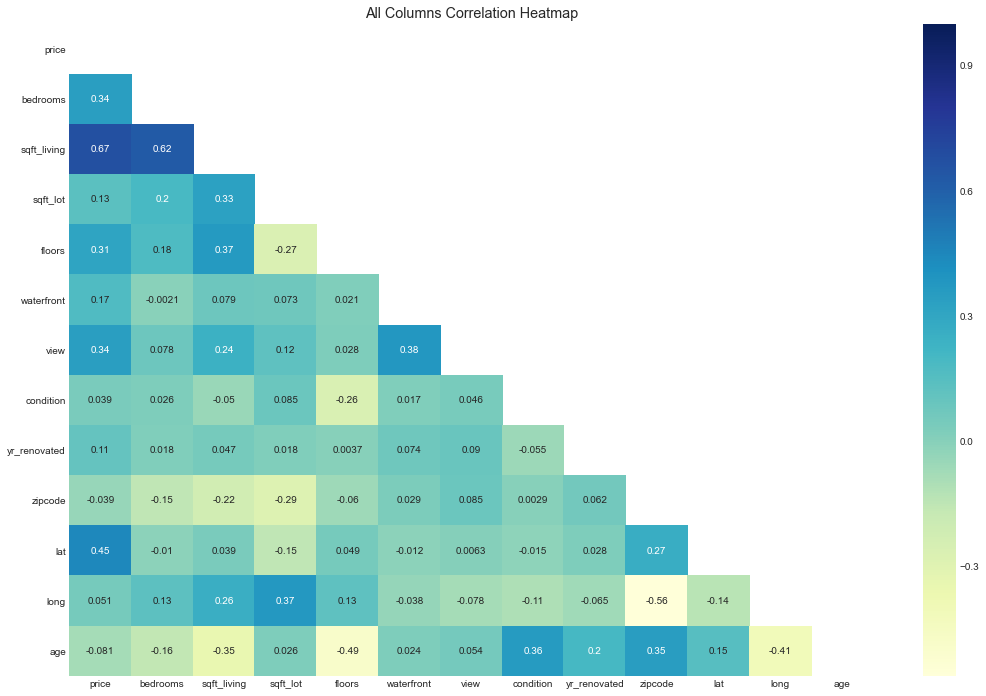

price        sqft_living    0.674829
bedrooms     sqft_living    0.621811
zipcode      long           0.564259
floors       age            0.489193
price        lat            0.448837
long         age            0.409993
waterfront   view           0.380543
sqft_lot     long           0.373922
sqft_living  floors         0.367566
condition    age            0.361592
dtype: float64


Write column name you would like to get rid of (Enter "x" to exit): x
Exiting!
There are 13 columns remaining in the data


In [291]:
model2.multicolinearity()

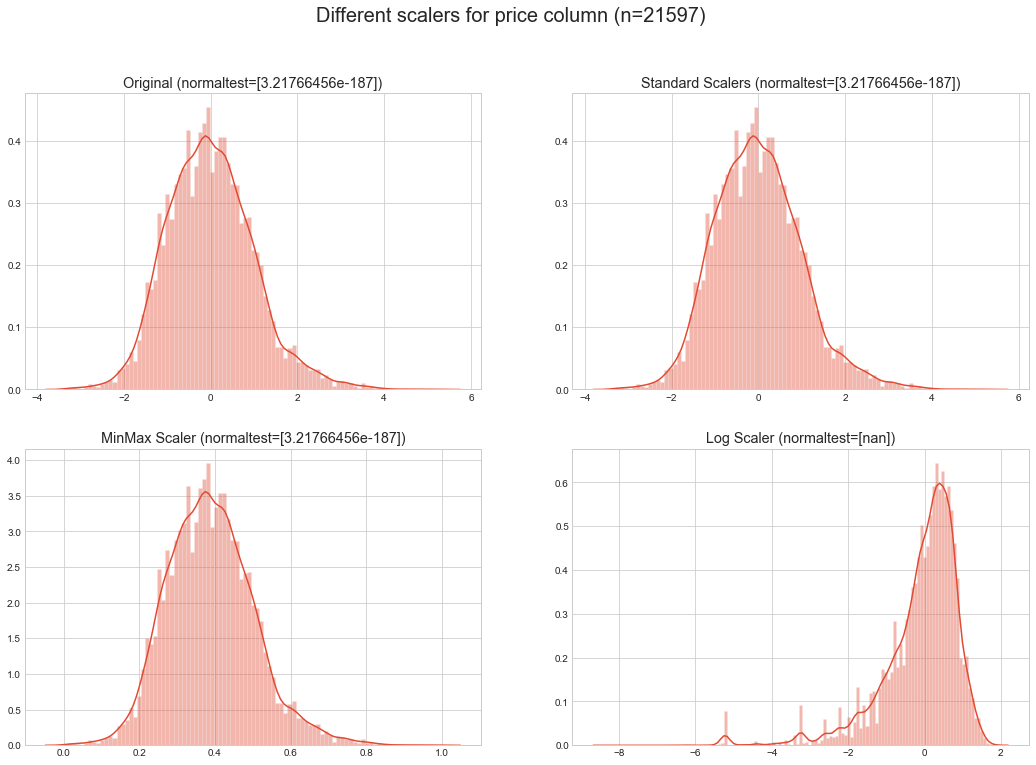

Choose an option (1) none (2) standard (3) min_max (4) logarithmic: 1
Nothing has changed.


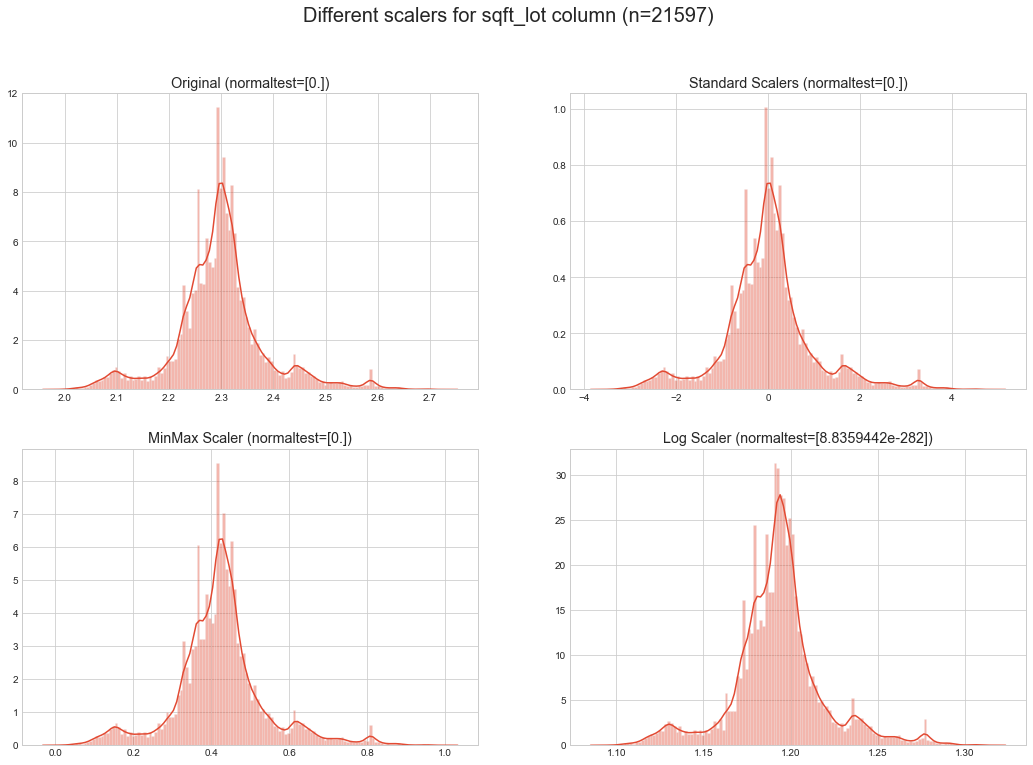

Choose an option (1) none (2) standard (3) min_max (4) logarithmic: 1
Nothing has changed.


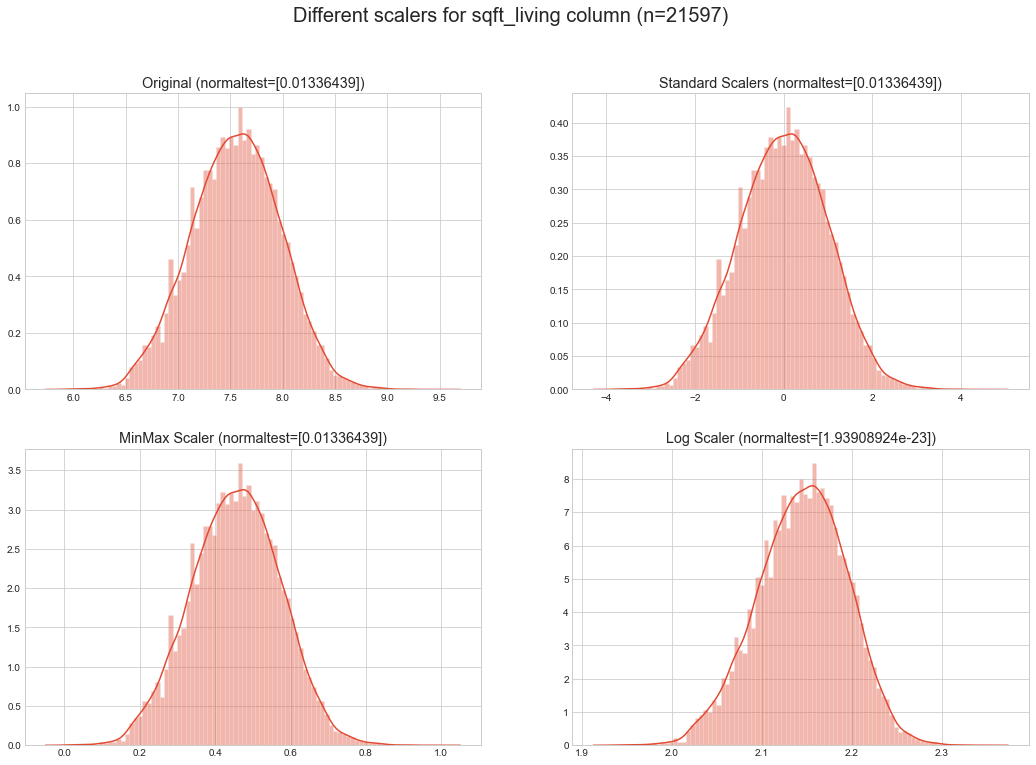

Choose an option (1) none (2) standard (3) min_max (4) logarithmic: 1
Nothing has changed.


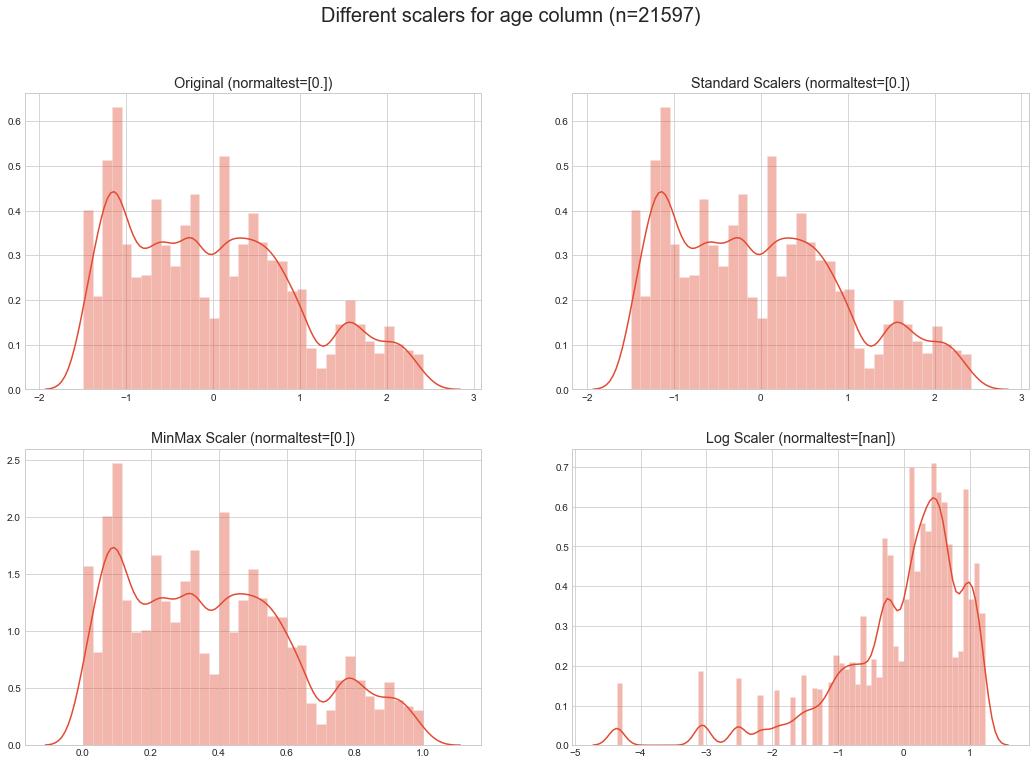

Choose an option (1) none (2) standard (3) min_max (4) logarithmic: 1
Nothing has changed.


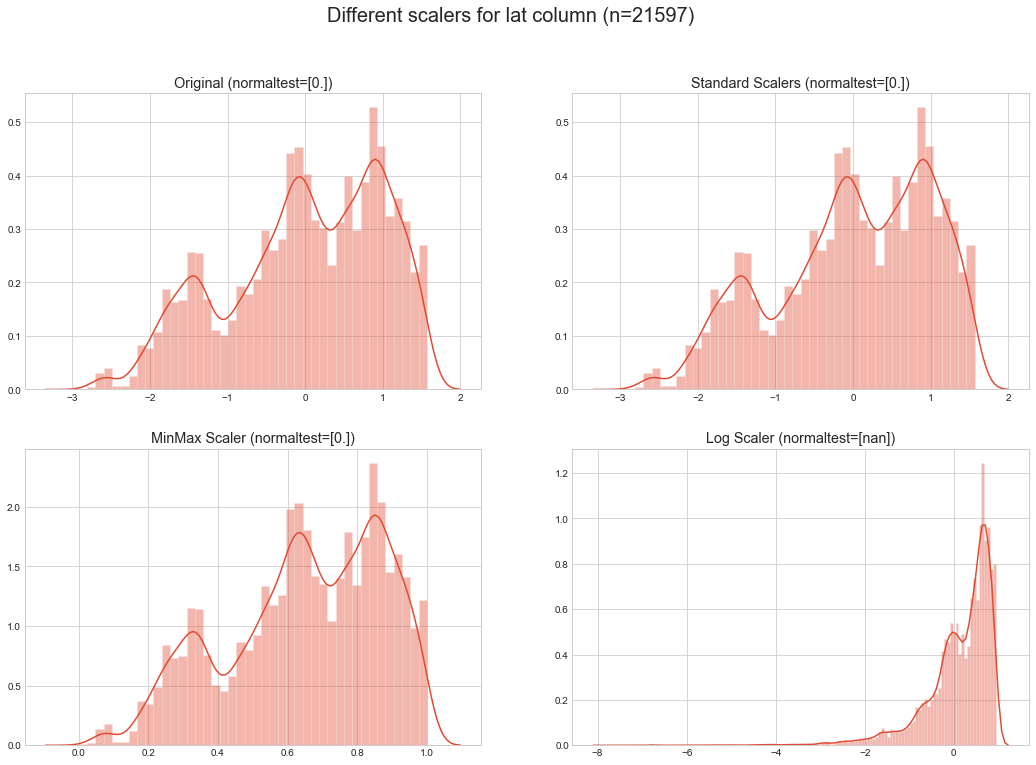

Choose an option (1) none (2) standard (3) min_max (4) logarithmic: 1
Nothing has changed.


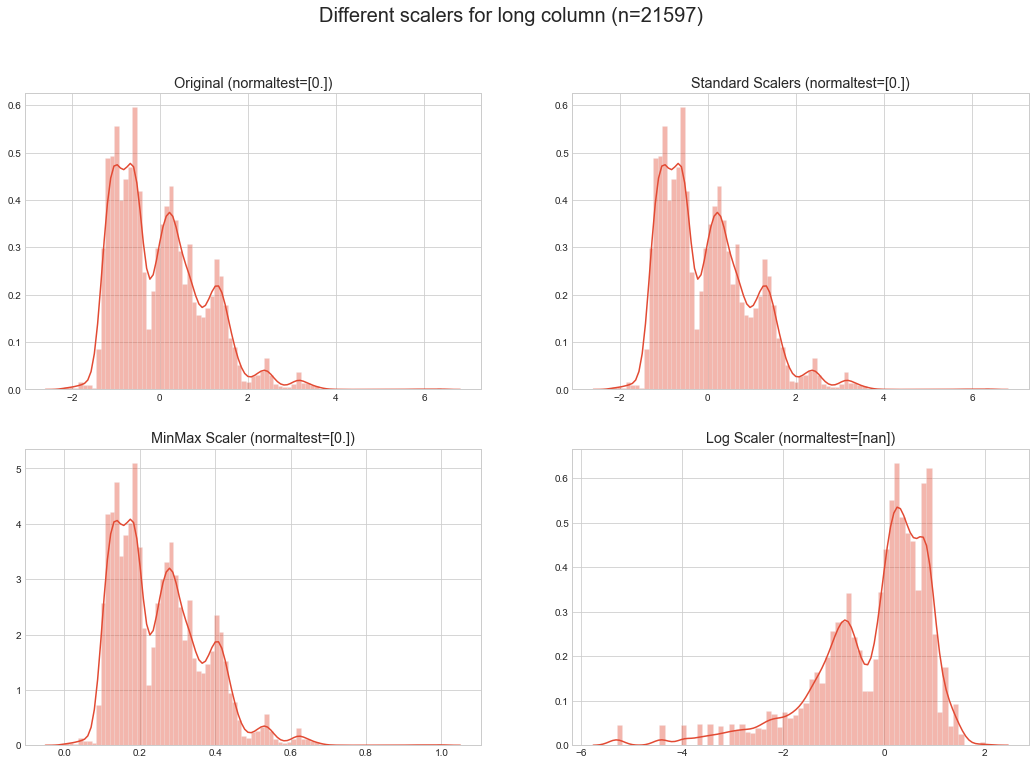

Choose an option (1) none (2) standard (3) min_max (4) logarithmic: 1
Nothing has changed.


In [292]:
for col in model2.cont_cols:
    model2.scaler(col)

In [287]:
model2.cont_cols

['price',
 'sqft_lot',
 'age',
 'price',
 'sqft_living',
 'sqft_lot',
 'lat',
 'long',
 'sqft_lot15',
 'age']

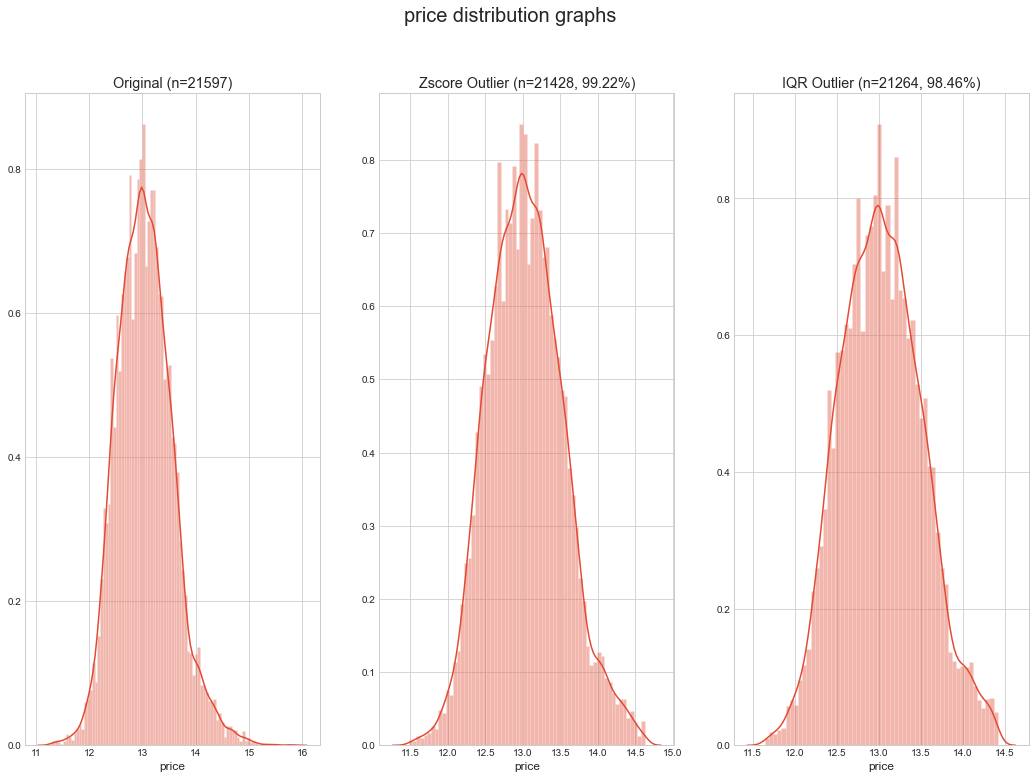

Choose an option (1) none (2) zscore method (3) IQR method (4) Drop column: 3


333 number of data have been removed by this process.

So far we have 98.458% of original data.


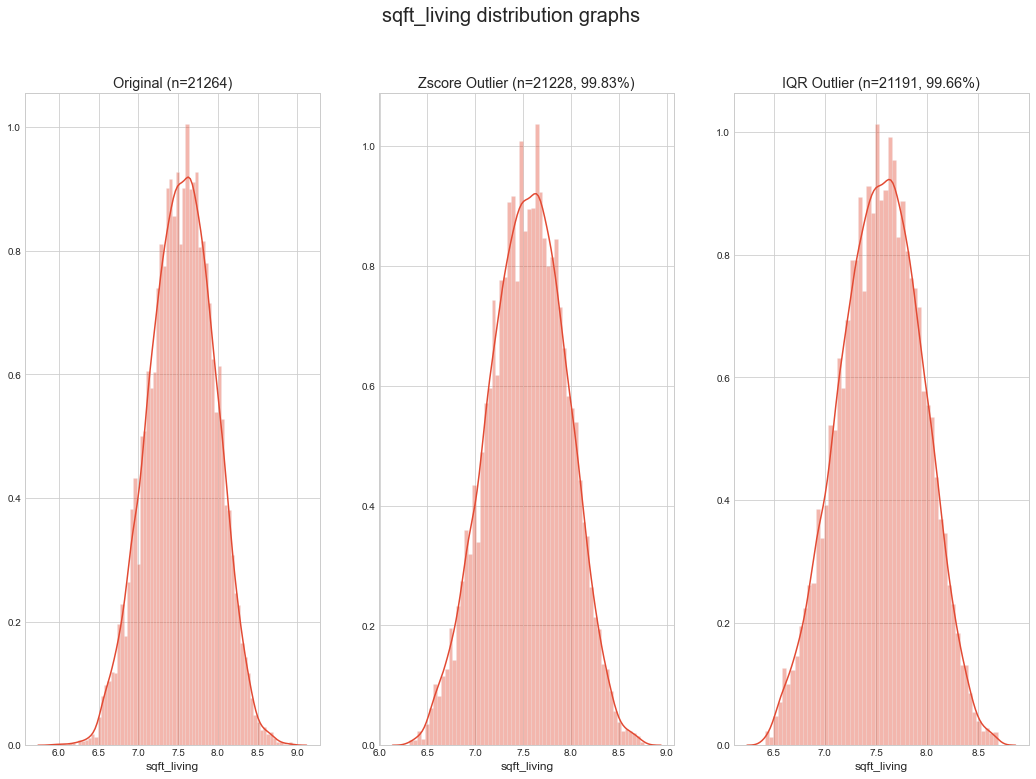

Choose an option (1) none (2) zscore method (3) IQR method (4) Drop column: 3


73 number of data have been removed by this process.

So far we have 98.12% of original data.


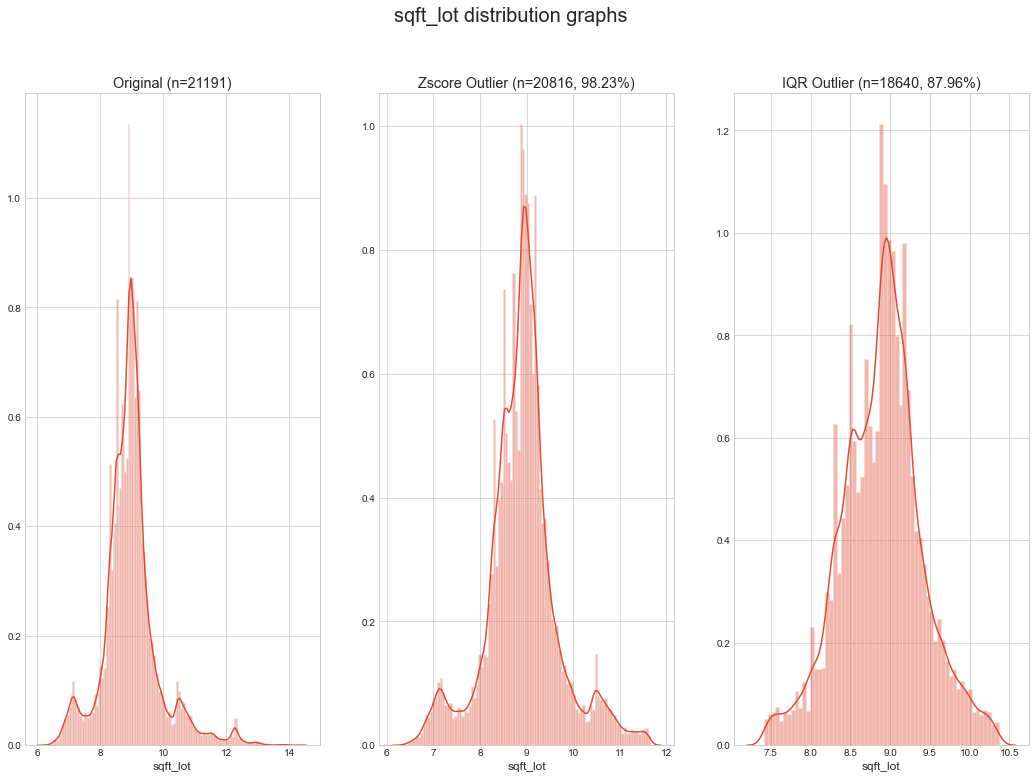

Choose an option (1) none (2) zscore method (3) IQR method (4) Drop column: 3


2551 number of data have been removed by this process.

So far we have 86.308% of original data.


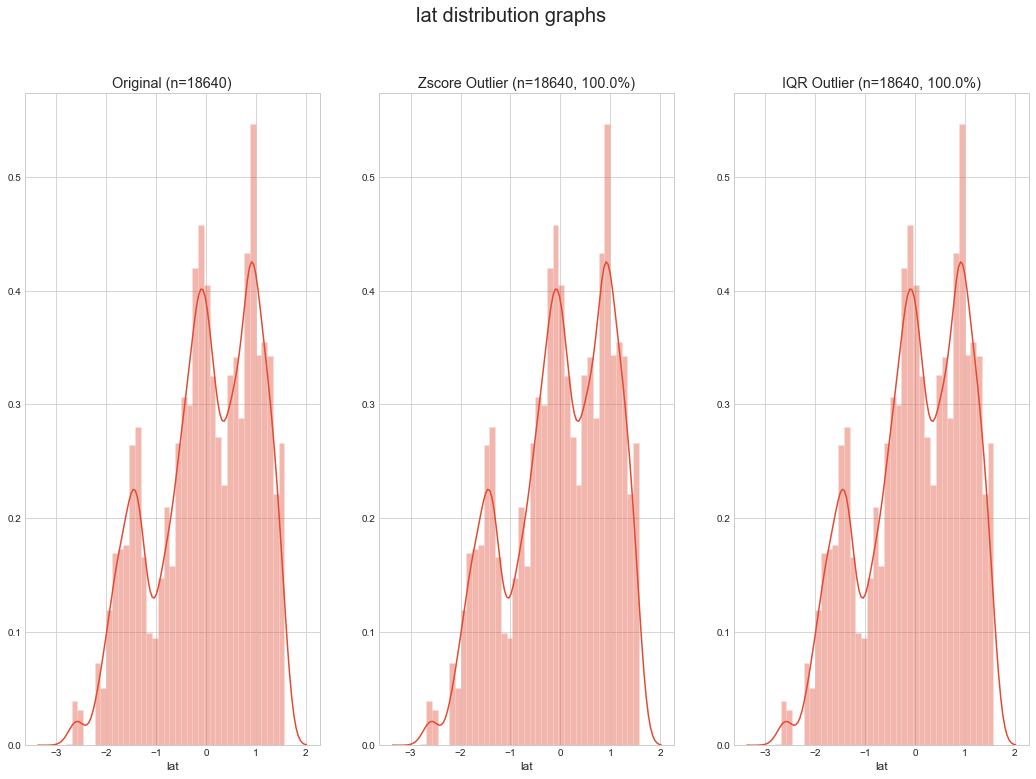

Choose an option (1) none (2) zscore method (3) IQR method (4) Drop column: 1
nothing has changed.


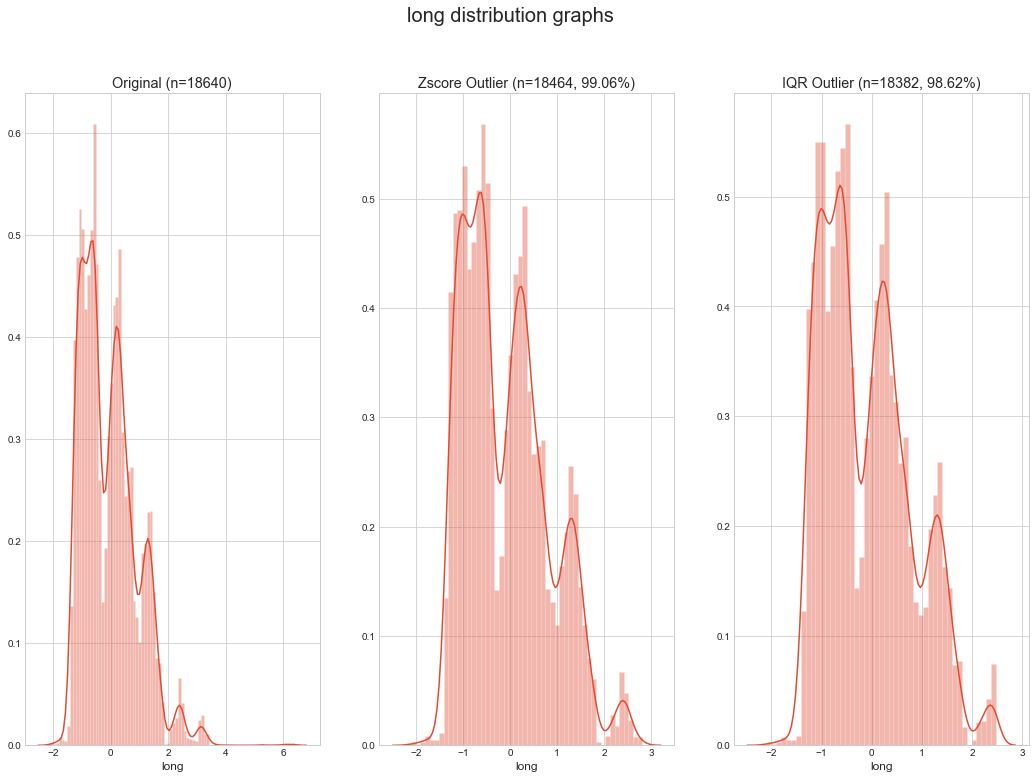

Choose an option (1) none (2) zscore method (3) IQR method (4) Drop column: 3


258 number of data have been removed by this process.

So far we have 85.114% of original data.


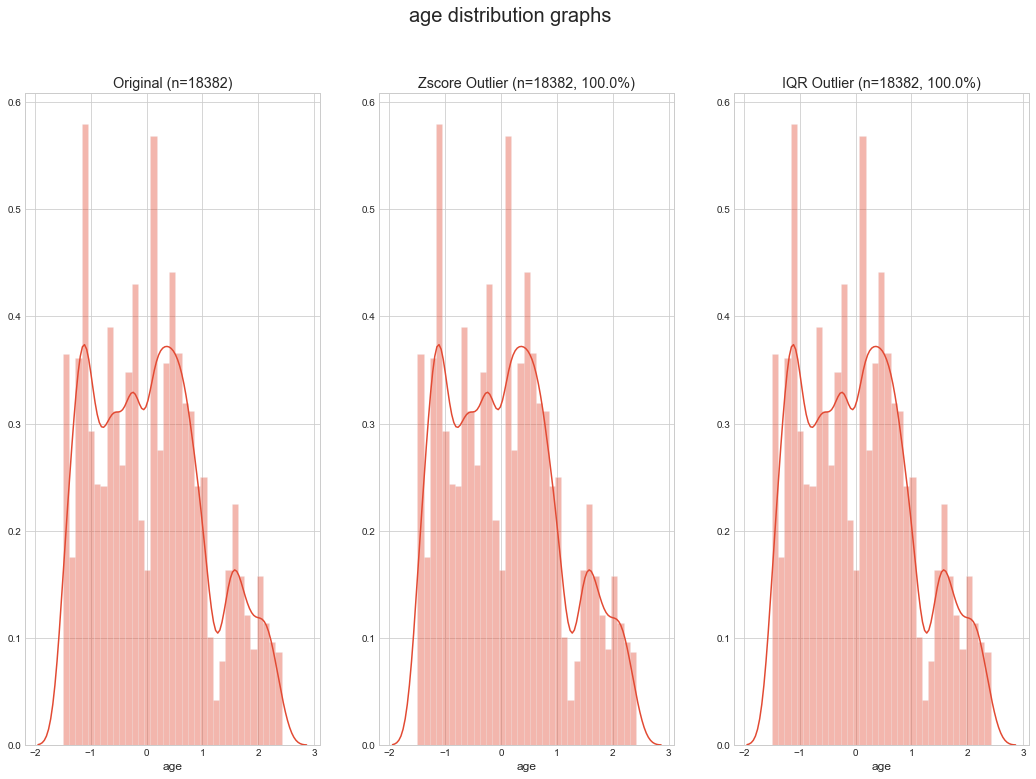

Choose an option (1) none (2) zscore method (3) IQR method (4) Drop column: 1
nothing has changed.


In [177]:
for col in model2.cont_cols:
    model2.outlier(col)

In [293]:
# Set X,y and split data
# model2.X = model2.data[model2.cont_cols].drop(columns=[model2.target])
# model2.y = model2.data[model2.target]
model2.split()

Shape of X_train: (16197, 5)
Shape of X_test: (5400, 5)
Shape of y_train: (16197,)
Shape of y_test: (5400,)


In [294]:
formula = model2.get_formula()
formula

'price ~ sqft_lot + sqft_living + age + lat + long'

In [295]:
model_2 = model2.regression(formula)
model_2.summary()

Formula:
price ~ sqft_lot + sqft_living + age + lat + long


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     5873.
Date:                Thu, 17 Sep 2020   Prob (F-statistic):               0.00
Time:                        04:10:43   Log-Likelihood:                -14631.
No. Observations:               16197   AIC:                         2.927e+04
Df Residuals:                   16191   BIC:                         2.932e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -11.6878      0.143    -81.689      0.000     -11.968     -11.407
sqft_lot       -0.4663      0.064     -7.340      0.000      -0.591      -0.342
sqft_living     1.6894      0.013    131.456      0.000       1.664       1.715
age             0.1087      0.006     18.980      0.000       0.097       0.120
lat             0.3951      0.005     80.868      0.000       0.385       0.405
long           -0.0212      0.006     -3.756      0.000      -0.032      -0.010
==============================================================================
Omnibus:                      360.910   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              509.471
Skew:                           0.258   Prob(JB):                    2.34e-111
Kurtosis:                       3.699   Cond. No.                         258.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Train MSE = 0.35654353791429083	Train R2 = 0.6445861163948137
Test MSE = 0.3497936288292578	Test R2 = 0.6468024429442272


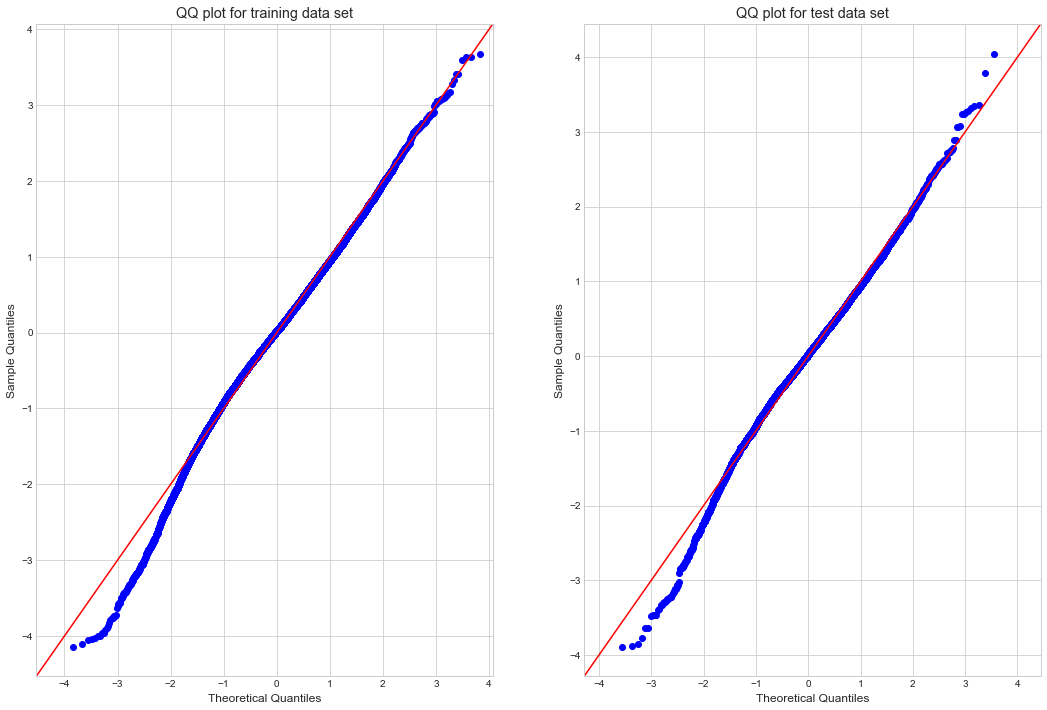

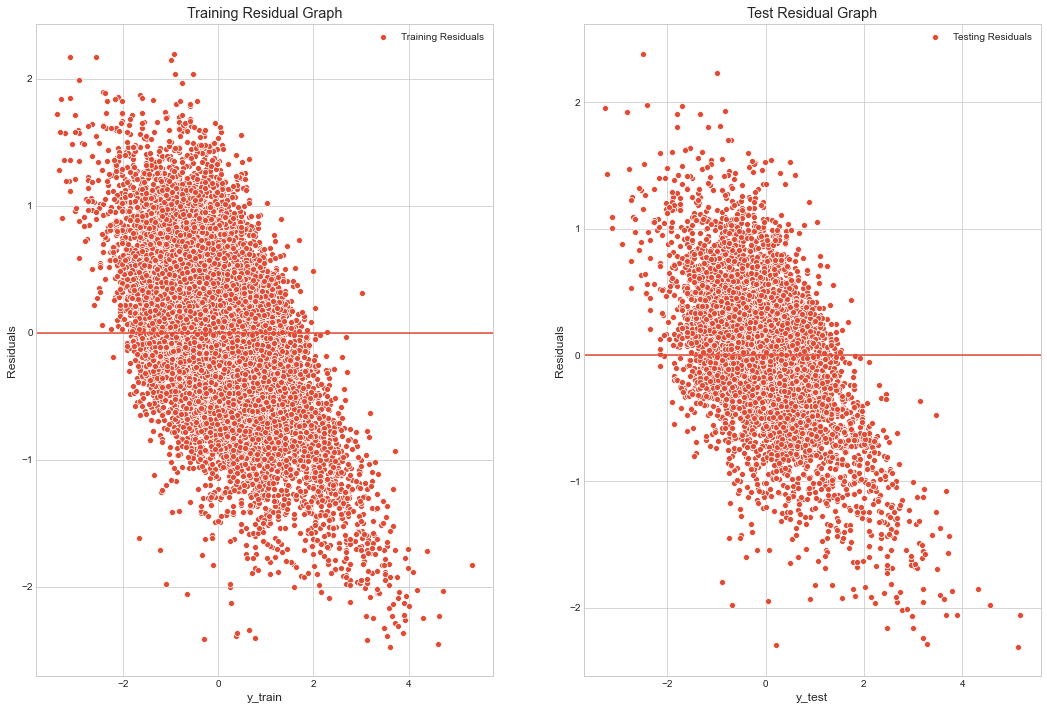

In [296]:
model2.validate_model()

In [ ]:
# practice

In [194]:
df[cat_cols]

bedrooms  floors  waterfront  view  condition  yr_renovated  zipcode
0             3     1.0         0.0   0.0          3         False    98178
1             3     2.0         0.0   0.0          3          True    98125
2             2     1.0         0.0   0.0          3         False    98028
3             4     1.0         0.0   0.0          5         False    98136
4             3     1.0         0.0   0.0          3         False    98074
...         ...     ...         ...   ...        ...           ...      ...
21592         3     3.0         0.0   0.0          3         False    98103
21593         4     2.0         0.0   0.0          3         False    98146
21594         2     2.0         0.0   0.0          3         False    98144
21595         3     2.0         0.0   0.0          3         False    98027
21596         2     2.0         0.0   0.0          3         False    98144

[21597 rows x 7 columns]

In [200]:
pd.get_dummies(data=df[cat_cols]) #, drop_first=True, prefix=cat_cols, prefix_sep='_')

bedrooms  floors  waterfront  view  condition  yr_renovated  zipcode
0             3     1.0         0.0   0.0          3         False    98178
1             3     2.0         0.0   0.0          3          True    98125
2             2     1.0         0.0   0.0          3         False    98028
3             4     1.0         0.0   0.0          5         False    98136
4             3     1.0         0.0   0.0          3         False    98074
...         ...     ...         ...   ...        ...           ...      ...
21592         3     3.0         0.0   0.0          3         False    98103
21593         4     2.0         0.0   0.0          3         False    98146
21594         2     2.0         0.0   0.0          3         False    98144
21595         3     2.0         0.0   0.0          3         False    98027
21596         2     2.0         0.0   0.0          3         False    98144

[21597 rows x 7 columns]

In [259]:
model2.data

age  bedrooms_10  bedrooms_11  bedrooms_2  bedrooms_3  \
0      0.544678          NaN          NaN         NaN         NaN   
1      0.680850          NaN          NaN         NaN         NaN   
2      1.293626          NaN          NaN         NaN         NaN   
3      0.204247          NaN          NaN         NaN         NaN   
4     -0.544700          NaN          NaN         NaN         NaN   
...         ...          ...          ...         ...         ...   
21587       NaN          NaN          NaN         NaN         NaN   
21589       NaN          NaN          NaN         NaN         NaN   
21590       NaN          NaN          NaN         NaN         NaN   
21593       NaN          NaN          NaN         NaN         NaN   
21595       NaN          NaN          NaN         NaN         NaN   

       bedrooms_33  bedrooms_4  bedrooms_5  bedrooms_6  bedrooms_7  ...  \
0              NaN         NaN         NaN         NaN         NaN  ...   
1              NaN         NaN         NaN         NaN         NaN  ...   
2              NaN         NaN         NaN         NaN         NaN  ...   
3              NaN         NaN         NaN         NaN         NaN  ...   
4              NaN         NaN         NaN         NaN         NaN  ...   
...            ...         ...         ...         ...         ...  ...   
21587          NaN         NaN         NaN         NaN         NaN  ...   
21589          NaN         NaN         NaN         NaN         NaN  ...   
21590          NaN         NaN         NaN         NaN         NaN  ...   
21593          NaN         NaN         NaN         NaN         NaN  ...   
21595          NaN         NaN         NaN         NaN         NaN  ...   

       zipcode_98146.0  zipcode_98148.0  zipcode_98155.0  zipcode_98166.0  \
0                  NaN              NaN              NaN              NaN   
1                  NaN              NaN              NaN              NaN   
2                  NaN              NaN              NaN              NaN   
3                  NaN              NaN              NaN              NaN   
4                  NaN              NaN              NaN              NaN   
...                ...              ...              ...              ...   
21587              0.0              0.0              0.0              0.0   
21589              0.0              0.0              0.0              0.0   
21590              0.0              0.0              0.0              0.0   
21593              0.0              0.0              0.0              0.0   
21595              0.0              0.0              0.0              0.0   

       zipcode_98168.0  zipcode_98177.0  zipcode_98178.0  zipcode_98188.0  \
0                  NaN              NaN              NaN              NaN   
1                  NaN              NaN              NaN              NaN   
2                  NaN              NaN              NaN              NaN   
3                  NaN              NaN              NaN              NaN   
4                  NaN              NaN              NaN              NaN   
...                ...              ...              ...              ...   
21587              0.0              0.0              0.0              0.0   
21589              0.0              0.0              0.0              0.0   
21590              0.0              0.0              0.0              0.0   
21593              0.0              0.0              0.0              0.0   
21595              0.0              0.0              0.0              0.0   

       zipcode_98198.0  zipcode_98199.0  
0                  NaN              NaN  
1                  NaN              NaN  
2                  NaN              NaN  
3                  NaN              NaN  
4                  NaN              NaN  
...                ...              ...  
21587              0.0              0.0  
21589              0.0              0.0  
21590              0.0              0.0  
21593       

In [218]:
pd.get_dummies(data=df, columns=['view', 'condition'], drop_first=True, prefix=['view','condition'])

price  bedrooms  sqft_living  sqft_lot  floors  waterfront  \
0      12.309987         3     7.074117  8.639588     1.0         0.0   
1      13.195616         3     7.852050  8.887791     2.0         0.0   
2      12.100718         2     6.647688  9.210440     1.0         0.0   
3      13.311331         4     7.581210  8.517393     1.0         0.0   
4      13.142168         3     7.427144  8.997271     1.0         0.0   
...          ...       ...          ...       ...     ...         ...   
21592  12.793862         3     7.333676  7.031741     3.0         0.0   
21593  12.899222         4     7.745436  8.668024     2.0         0.0   
21594  12.904461         2     6.928538  7.208600     2.0         0.0   
21595  12.899222         3     7.378384  7.778630     2.0         0.0   
21596  12.691584         2     6.928538  6.981935     2.0         0.0   

       yr_renovated  zipcode       lat      long       age  view_1.0  \
0             False    98178 -0.352894 -0.305695  0.544678         0   
1              True    98125  1.161376 -0.746286  0.680850         0   
2             False    98028  1.283355 -0.135144  1.293626         0   
3             False    98136 -0.283604 -1.272151  0.204247         0   
4             False    98074  0.409293  1.200840 -0.544700         0   
...             ...      ...       ...       ...       ...       ...   
21592         False    98103  1.004752 -0.938156 -1.293648         0   
21593         False    98146 -0.356503 -1.051856 -1.463863         0   
21594         False    98144  0.247617 -0.604160 -1.293648         0   
21595         False    98027 -0.184722  1.030289 -1.123432         0   
21596         False    98144  0.245452 -0.604160 -1.259605         0   

       view_2.0  view_3.0  view_4.0  condition_2  condition_3  condition_4  \
0             0         0         0            0            1            0   
1             0         0         0            0            1            0   
2             0         0         0            0            1            0   
3             0         0         0            0            0            0   
4             0         0         0            0            1            0   
...         ...       ...       ...          ...          ...          ...   
21592         0         0         0            0            1            0   
21593         0         0         0            0            1            0   
21594         0         0         0            0            1            0   
21595         0         0         0            0            1            0   
21596         0         0         0            0            1            0   

       condition_5  
0                0  
1                0  
2                0  
3                1  
4                0  
...            ...  
21592            0  
21593            0  
21594            0  
21595            0  
21596            0  

[21597 rows x 19 columns]

In [229]:
model2.get_col_info('view')

Column Name: view
Number of unique values: 5
0.0    0.908225
2.0    0.043303
3.0    0.021325
1.0    0.016157
4.0    0.010989
Name: view, dtype: float64


In [299]:
model2.ohe()

price  bedrooms  sqft_living  sqft_lot       lat      long  \
0     -1.402030         3     7.074117  2.265878 -0.352894 -0.305695   
1      0.279944         3     7.852050  2.291301  1.161376 -0.746286   
2     -1.799470         2     6.647688  2.323411  1.283355 -0.135144   
3      0.499709         4     7.581210  2.253121 -0.283604 -1.272151   
4      0.178437         3     7.427144  2.302312  0.409293  1.200840   
...         ...       ...          ...       ...       ...       ...   
21592 -0.483060         3     7.333676  2.083401  1.004752 -0.938156   
21593 -0.282962         4     7.745436  2.268824 -0.356503 -1.051856   
21594 -0.273012         2     6.928538  2.105182  0.247617 -0.604160   
21595 -0.282962         3     7.378384  2.172320 -0.184722  1.030289   
21596 -0.677306         2     6.928538  2.077181  0.245452 -0.604160   

            age  floors_1.5  floors_2.0  floors_2.5  ...  zipcode_98146  \
0      0.544678           0           0           0  ...              0   
1      0.680850           0           1           0  ...              0   
2      1.293626           0           0           0  ...              0   
3      0.204247           0           0           0  ...              0   
4     -0.544700           0           0           0  ...              0   
...         ...         ...         ...         ...  ...            ...   
21592 -1.293648           0           0           0  ...              0   
21593 -1.463863           0           1           0  ...              1   
21594 -1.293648           0           1           0  ...              0   
21595 -1.123432           0           1           0  ...              0   
21596 -1.259605           0           1           0  ...              0   

       zipcode_98148  zipcode_98155  zipcode_98166  zipcode_98168  \
0                  0              0              0              0   
1                  0              0              0              0   
2                  0              0              0              0   
3                  0              0              0              0   
4                  0              0              0              0   
...              ...            ...            ...            ...   
21592              0              0              0              0   
21593              0              0              0              0   
21594              0              0              0              0   
21595              0              0              0              0   
21596              0              0              0              0   

       zipcode_98177  zipcode_98178  zipcode_98188  zipcode_98198  \
0                  0              1              0              0   
1                  0              0              0              0   
2                  0              0              0              0   
3                  0              0              0              0   
4                  0              0              0              0   
...              ...            ...            ...            ...   
21592              0              0              0              0   
21593              0              0              0              0   
21594              0              0              0              0   
21595              0              0              0              0   
21596              0              0              0              0   

       zipcode_98199  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
...              ...  
21592              0  
21593              0  
21594              0  
21595              0  
21596              0  

[21597 rows x 91 columns]

In [298]:
model2.data

price  bedrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0     -1.402030         3     7.074117  2.265878     1.0         0.0   0.0   
1      0.279944         3     7.852050  2.291301     2.0         0.0   0.0   
2     -1.799470         2     6.647688  2.323411     1.0         0.0   0.0   
3      0.499709         4     7.581210  2.253121     1.0         0.0   0.0   
4      0.178437         3     7.427144  2.302312     1.0         0.0   0.0   
...         ...       ...          ...       ...     ...         ...   ...   
21592 -0.483060         3     7.333676  2.083401     3.0         0.0   0.0   
21593 -0.282962         4     7.745436  2.268824     2.0         0.0   0.0   
21594 -0.273012         2     6.928538  2.105182     2.0         0.0   0.0   
21595 -0.282962         3     7.378384  2.172320     2.0         0.0   0.0   
21596 -0.677306         2     6.928538  2.077181     2.0         0.0   0.0   

       condition  yr_renovated  zipcode       lat      long       age  
0              3         False    98178 -0.352894 -0.305695  0.544678  
1              3          True    98125  1.161376 -0.746286  0.680850  
2              3         False    98028  1.283355 -0.135144  1.293626  
3              5         False    98136 -0.283604 -1.272151  0.204247  
4              3         False    98074  0.409293  1.200840 -0.544700  
...          ...           ...      ...       ...       ...       ...  
21592          3         False    98103  1.004752 -0.938156 -1.293648  
21593          3         False    98146 -0.356503 -1.051856 -1.463863  
21594          3         False    98144  0.247617 -0.604160 -1.293648  
21595          3         False    98027 -0.184722  1.030289 -1.123432  
21596          3         False    98144  0.245452 -0.604160 -1.259605  

[21597 rows x 13 columns]

In [238]:
pd.get_dummies(data=df[cat_cols], columns =cat_cols, prefix='view', )

view_1  view_2  view_3  view_4  view_5  view_6  view_7  view_8  view_9  \
0           0       0       1       0       0       0       0       0       0   
1           0       0       1       0       0       0       0       0       0   
2           0       1       0       0       0       0       0       0       0   
3           0       0       0       1       0       0       0       0       0   
4           0       0       1       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
21592       0       0       1       0       0       0       0       0       0   
21593       0       0       0       1       0       0       0       0       0   
21594       0       1       0       0       0       0       0       0       0   
21595       0       0       1       0       0       0       0       0       0   
21596       0       1       0       0       0       0       0       0       0   

       view_10  ...  view_98146  view_98148  view_98155  view_98166  \
0            0  ...           0           0           0           0   
1            0  ...           0           0           0           0   
2            0  ...           0           0           0           0   
3            0  ...           0           0           0           0   
4            0  ...           0           0           0           0   
...        ...  ...         ...         ...         ...         ...   
21592        0  ...           0           0           0           0   
21593        0  ...           1           0           0           0   
21594        0  ...           0           0           0           0   
21595        0  ...           0           0           0           0   
21596        0  ...           0           0           0           0   

       view_98168  view_98177  view_98178  view_98188  view_98198  view_98199  
0               0           0           1           0           0           0  
1               0           0           0           0           0           0  
2               0           0           0           0           0           0  
3               0           0           0           0           0           0  
4               0           0           0           0           0           0  
...           ...         ...         ...         ...         ...         ...  
21592           0           0           0           0           0           0  
21593           0           0           0           0           0           0  
21594           0           0           0           0           0           0  
21595           0           0           0           0           0           0  
21596           0           0           0           0           0           0  

[21597 rows x 102 columns]

In [240]:
a = pd.get_dummies(data=df['view'], columns ='view', prefix='view', )
b = pd.get_dummies(data=df['waterfront'], columns ='waterfront', prefix='waterfront', )

In [248]:
c = pd.concat([a,b], axis=1)

In [247]:
cat_cols.remove('waterfront')

In [251]:
cat_cols.append(list(c.columns))

In [252]:
cat_cols

['bedrooms',
 'floors',
 'condition',
 'yr_renovated',
 'zipcode',
 Index(['view_0.0', 'view_1.0', 'view_2.0', 'view_3.0', 'view_4.0',
        'waterfront_0.0', 'waterfront_1.0'],
       dtype='object'),
 ['view_0.0',
  'view_1.0',
  'view_2.0',
  'view_3.0',
  'view_4.0',
  'waterfront_0.0',
  'waterfront_1.0']]

In [ ]:
model3 = MakeModel()